<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass5/bdm/F4/F4_Assignment_5_Automated_Feature_Engineering_Tools%5BFeatureTools%5D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Used Cars Dataset
[Kaggle Link](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/data)

Craigslist is the world's largest collection of used vehicles for sale, yet it's very difficult to collect all of them in the same place. I built a scraper for a school project and expanded upon it later to create this dataset which includes every used vehicle entry within the United States on Craigslist.

This data is scraped every few months, it contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 18 other categories.

Project Team:

LYE KAH HOOI (MCS231010)\
THONG YEE MOON (MCS231001)\
LEE SEOW MING THERESA (MCS231013)\
SITI NORAFIZAH BINTI AB AZIZ (MCS231018)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Upload the kaggle Token

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thongyeemoon","key":"03b620ecbe891a539bd2b576ee07daf2"}'}

## Data Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()
import re

In [ ]:
! pip install kaggle --quiet
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                              title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
carlmcbrideellis/llm-7-prompt-training-dataset                   LLM: 7 prompt training dataset                     41MB  2023-11-15 07:32:56           1021         88  1.0              
thedrcat/daigt-v2-train-dataset                                  DAIGT V2 Train Dataset                             29MB  2023-11-16 01:38:36            532         74  1.0              
muhammadbinimran/housing-price-prediction-data                   Housing Price Prediction Data                     763KB  2023-11-21 17:56:32           1356         29  1.0              
thedrcat/daigt-proper-train-dataset                              

In [ ]:
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

 97% 254M/262M [00:01<00:00, 205MB/s]
100% 262M/262M [00:01<00:00, 192MB/s]


In [ ]:
!unzip -u "/content/craigslist-carstrucks-data.zip"

Archive:  /content/craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


In [ ]:
df = pd.read_csv("/content/vehicles.csv")

# EDA

## Dataset overview

In [ ]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
df.shape

(426880, 26)

In [ ]:
df.head(5)

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
1          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
2          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
3          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
4          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   

  image_url description county state lat long posting_date  
0       NaN         NaN    NaN    az NaN  NaN          NaN  
1       NaN         NaN    NaN    ar NaN  NaN          NaN  
2       NaN         NaN    NaN    fl NaN  NaN          NaN  
3       NaN         NaN    NaN    ma NaN  NaN          NaN  
4       NaN         NaN    NaN    nc NaN  NaN          NaN  

[5 rows x 26 columns]

In [ ]:
df.tail(3)

id                                                url  \
426877  7301591147  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426878  7301591140  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426879  7301591129  https://wyoming.craigslist.org/ctd/d/atlanta-2...   

         region                      region_url  price    year manufacturer  \
426877  wyoming  https://wyoming.craigslist.org  34990  2020.0     cadillac   
426878  wyoming  https://wyoming.craigslist.org  28990  2018.0        lexus   
426879  wyoming  https://wyoming.craigslist.org  30590  2019.0          bmw   

                           model condition    cylinders  ... size       type  \
426877          xt4 sport suv 4d      good          NaN  ...  NaN  hatchback   
426878           es 350 sedan 4d      good  6 cylinders  ...  NaN      sedan   
426879  4 series 430i gran coupe      good          NaN  ...  NaN      coupe   

       paint_color                                          image_url  \
426877       white  https://images.craigslist.org/00L0L_farM7bxnxR...   
426878      silver  https://images.craigslist.org/00z0z_bKnIVGLkDT...   
426879         NaN  https://images.craigslist.org/00Y0Y_lEUocjyRxa...   

                                              description county state  \
426877  Carvana is the safer way to buy a car During t...    NaN    wy   
426878  Carvana is the safer way to buy a car During t...    NaN    wy   
426879  Carvana is the safer way to buy a car During t...    NaN    wy   

              lat       long              posting_date  
426877  33.779214 -84.411811  2021-04-04T03:21:17-0600  
426878  33.786500 -84.445400  2021-04-04T03:21:11-0600  
426879  33.779214 -84.411811  2021-04-04T03:21:07-0600  

[3 rows x 26 columns]

In [ ]:
df.describe()

id         price           year      odometer  county  \
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05     0.0   
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04     NaN   
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05     NaN   
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00     NaN   
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04     NaN   
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04     NaN   
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05     NaN   
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07     NaN   

                 lat           long  
count  420331.000000  420331.000000  
mean       38.493940     -94.748599  
std         5.841533      18.365462  
min       -84.122245    -159.827728  
25%        34.601900    -111.939847  
50%        39.150100     -88.432600  
75%        42.398900     -80.832039  
max        82.390818     173.885502

In [ ]:
df.describe(include='object')

url    region  \
count                                              426880    426880   
unique                                             426880       404   
top     https://prescott.craigslist.org/cto/d/prescott...  columbus   
freq                                                    1      3608   

                            region_url manufacturer   model condition  \
count                           426880       409234  421603    252776   
unique                             413           42   29667         6   
top     https://spokane.craigslist.org         ford   f-150      good   
freq                              2988        70985    8009    121456   

          cylinders    fuel title_status transmission                VIN  \
count        249202  423867       418638       424324             265838   
unique            8       5            6            3             118264   
top     6 cylinders     gas        clean    automatic  1FMJU1JT1HEA52352   
freq          94169  356209       405117       336524                261   

         drive       size    type paint_color  \
count   296313     120519  334022      296677   
unique       3          4      13          12   
top        4wd  full-size   sedan       white   
freq    131904      63465   87056       79285   

                                                image_url  \
count                                              426812   
unique                                             241899   
top     https://images.craigslist.org/00N0N_1xMPvfxRAI...   
freq                                                 7357   

                                              description   state  \
count                                              426810  426880   
unique                                             360911      51   
top     35 VEHICLES PRICED UNDER $3000!!!  BIG TIME! T...      ca   
freq                                                  231   50614   

                    posting_date  
count                     426812  
unique                    381536  
top     2021-04-23T22:13:05-0400  
freq                          12

In [ ]:
# To observe unique variable for conditioner variables

print(df['cylinders'].unique())
print(df['size'].unique())
print(df['condition'].unique())
print(df['fuel'].unique())
print(df['transmission'].unique())
print(df['drive'].unique())
print(df['type'].unique())
print(df['paint_color'].unique())
print(df['title_status'].unique())

[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
[nan 'full-size' 'mid-size' 'compact' 'sub-compact']
[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
[nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
[nan 'other' 'automatic' 'manual']
[nan 'rwd' '4wd' 'fwd']
[nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']
[nan 'white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']
[nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']


## Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [ ]:
df['cylinders'].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [ ]:
df[['cylinders','unit']] = df['cylinders'].str.split(" ",expand = True)

# Drop unit variable
df.drop(['unit'],inplace=True,axis=1)
df['cylinders'].unique()

array([nan, '8', '6', '4', '5', 'other', '3', '10', '12'], dtype=object)

In [ ]:
df['cylinders'].replace(to_replace=['other'],value=[np.nan],inplace=True)
df['cylinders'].unique()

array([nan, '8', '6', '4', '5', '3', '10', '12'], dtype=object)

In [ ]:
df['id']=df['id'].astype(object)
df['cylinders']=df['cylinders'].astype(float)

In [ ]:
df['posting_date']= pd.to_datetime(df['posting_date'])

In [ ]:
df['year']= pd.to_datetime(df['year'], format='%Y')
df['year'] = df['year'].dt.year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  object 
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     247904 non-null  float64
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

## Missing Value

In [ ]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       178976
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [ ]:
## Drop Empty County Column.
df.drop(['county'],inplace=True,axis=1)

In [ ]:
# Fill OBJECT empty cell with "Not Provided"
df['manufacturer'].fillna("Not Provided",inplace=True)
df['model'].fillna("Not Provided",inplace=True)
df['condition'].fillna("Not Provided",inplace=True)
df['fuel'].fillna("Not Provided",inplace=True)
df['drive'].fillna("Not Provided",inplace=True)
df['title_status'].fillna("Not Provided",inplace=True)
df['transmission'].fillna("Not Provided",inplace=True)
df['VIN'].fillna("Not Provided",inplace=True)
df['size'].fillna("Not Provided",inplace=True)
df['type'].fillna("Not Provided",inplace=True)
df['paint_color'].fillna("Not Provided",inplace=True)
df['image_url'].fillna("Not Provided",inplace=True)
df['description'].fillna("Not Available",inplace=True)

# No action will be do on numerical variable

In [ ]:
df['posting_date'].fillna(method="ffill",inplace=True)
df['posting_date'].fillna(method="bfill",inplace=True)
df['year'].fillna(method="ffill",inplace=True)
df['year'].fillna(method="bfill",inplace=True)

In [ ]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders       178976
fuel                 0
odometer          4400
title_status         0
transmission         0
VIN                  0
drive                0
size                 0
type                 0
paint_color          0
image_url            0
description          0
state                0
lat               6549
long              6549
posting_date         0
dtype: int64

## Duplicate Value

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates()

id                                                url  \
0       7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1       7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2       7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3       7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4       7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
...            ...                                                ...   
426875  7301591192  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426876  7301591187  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426877  7301591147  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426878  7301591140  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426879  7301591129  https://wyoming.craigslist.org/ctd/d/atlanta-2...   

                        region                         region_url  price  \
0                     prescott    https://prescott.craigslist.org   6000   
1                 fayetteville       https://fayar.craigslist.org  11900   
2                 florida keys        https://keys.craigslist.org  21000   
3       worcester / central MA   https://worcester.craigslist.org   1500   
4                   greensboro  https://greensboro.craigslist.org   4900   
...                        ...                                ...    ...   
426875                 wyoming     https://wyoming.craigslist.org  23590   
426876                 wyoming     https://wyoming.craigslist.org  30590   
426877                 wyoming     https://wyoming.craigslist.org  34990   
426878                 wyoming     https://wyoming.craigslist.org  28990   
426879                 wyoming     https://wyoming.craigslist.org  30590   

          year  manufacturer                     model     condition  \
0       2014.0  Not Provided              Not Provided  Not Provided   
1       2014.0  Not Provided              Not Provided  Not Provided   
2       2014.0  Not Provided              Not Provided  Not Provided   
3       2014.0  Not Provided              Not Provided  Not Provided   
4       2014.0  Not Provided              Not Provided  Not Provided   
...        ...           ...                       ...           ...   
426875  2019.0        nissan         maxima s sedan 4d          good   
426876  2020.0         volvo  s60 t5 momentum sedan 4d          good   
426877  2020.0      cadillac          xt4 sport suv 4d          good   
426878  2018.0         lexus           es 350 sedan 4d          good   
426879  2019.0           bmw  4 series 430i gran coupe          good   

        cylinders  ...         drive          size          type  \
0             NaN  ...  Not Provided  Not Provided  Not Provided   
1             NaN  ...  Not Provided  Not Provided  Not Provided   
2             NaN  ...  Not Provided  Not Provided  Not Provided   
3             NaN  ...  Not Provided  Not Provided  Not Provided   
4             NaN  ...  Not Provided  Not Provided  Not Provided   
...           ...  ...           ...           ...           ...   
426875        6.0  ...           fwd  Not Provided         sedan   
426876        NaN  ...           fwd  Not Provided         sedan   
426877        NaN  ...  Not Provided  Not Provided     hatchback   
426878        6.0  ...           fwd  Not Provided         sedan   
426879        NaN  ...           rwd  Not Provided         coupe   

         paint_color                                          image_url  \
0       Not Provided                                       Not Provided   
1       Not Provided                                       Not Provided   
2       Not Provided                                       Not Provided   
3       Not Provided                                       Not Provided   
4       Not Provided                                       Not Provided   
...              ...                                                ...   
426875  Not Provide

In [ ]:
df.duplicated().all()

False

## Univariable Analysis

1. 'id'
2. 'url' --> drop
3. 'region'
4. 'region_url' --> drop
5. 'price'
6. 'year'
7. 'manufacturer'
8. 'model'
9. 'condition'
10. 'cylinders'
11. 'fuel'
12. 'odometer'
13. 'title_status'
14. 'transmission'
15. 'VIN' --> drop
16. 'drive'
17. 'size'
18. 'type'
19. 'paint_color'
20. 'image_url' --> drop
21. 'description' --> drop
22. 'state'
23. 'lat', 'long' --> drop
24. 'posting_date'

### 1. id

In [ ]:
df['id'].describe()

count         426880
unique        426880
top       7222695916
freq               1
Name: id, dtype: int64

In [ ]:
id_uniqueness = (df.id.count()/df.id.nunique()*100)
id_uniqueness

100.0

In [ ]:
id_count = df['id'].value_counts().rename_axis('url').reset_index(name='count')
id_count

url  count
0       7222695916      1
1       7313139418      1
2       7313423023      1
3       7313423324      1
4       7313424533      1
...            ...    ...
426875  7314655506      1
426876  7314655833      1
426877  7314657468      1
426878  7314659947      1
426879  7301591129      1

[426880 rows x 2 columns]

100% of uniqueness = No duplication on id where proved it is suitable fit as key variable.

### 2. url

In [ ]:
df['url'].describe()

count                                                426880
unique                                               426880
top       https://prescott.craigslist.org/cto/d/prescott...
freq                                                      1
Name: url, dtype: object

In [ ]:
url_uniqueness = (df.url.count()/df.url.nunique()*100)
url_uniqueness

100.0

In [ ]:
url_count = df['url'].value_counts().rename_axis('url').reset_index(name='count')
url_count

url  count
0       https://prescott.craigslist.org/cto/d/prescott...      1
1       https://nh.craigslist.org/cto/d/troy-1998-dodg...      1
2       https://nh.craigslist.org/ctd/d/north-hampton-...      1
3       https://nh.craigslist.org/ctd/d/derry-2008-chr...      1
4       https://nh.craigslist.org/ctd/d/derry-2002-toy...      1
...                                                   ...    ...
426875  https://chicago.craigslist.org/chc/cto/d/pleas...      1
426876  https://chicago.craigslist.org/wcl/cto/d/saint...      1
426877  https://chicago.craigslist.org/nwc/cto/d/north...      1
426878  https://chicago.craigslist.org/sox/cto/d/chica...      1
426879  https://wyoming.craigslist.org/ctd/d/atlanta-2...      1

[426880 rows x 2 columns]

As shown above each id having unique url link.

Url link is dropped due to duplication with id.

In [ ]:
df.drop(['url'],inplace=True,axis=1)

### 3. region

In [ ]:
df['region'].describe()

count       426880
unique         404
top       columbus
freq          3608
Name: region, dtype: object

In [ ]:
region_count=df['region'].value_counts().rename_axis('region').reset_index(name='count')
region_count

region  count
0                   columbus   3608
1               jacksonville   3562
2    spokane / coeur d'alene   2988
3                     eugene   2985
4            fresno / madera   2983
..                       ...    ...
399                 meridian     28
400             southwest MS     14
401              kansas city     11
402           fort smith, AR      9
403      west virginia (old)      8

[404 rows x 2 columns]

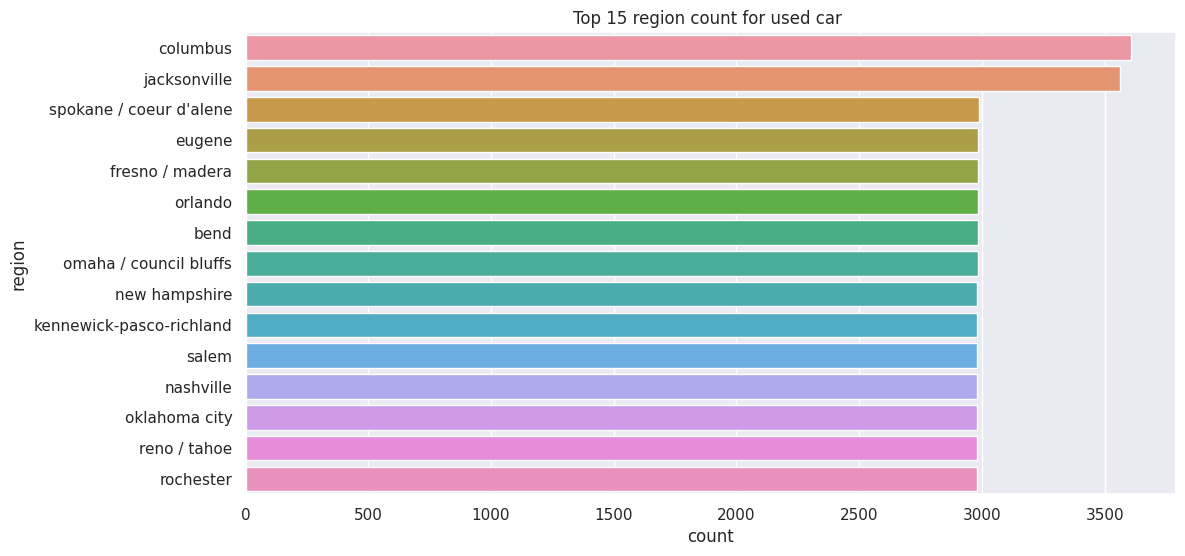

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='region',data=region_count.nlargest(15, 'count')).set(title='Top 15 region count for used car ')
plt.show()

### 4. region url

In [ ]:
df['region_url'].describe()

count                             426880
unique                               413
top       https://spokane.craigslist.org
freq                                2988
Name: region_url, dtype: object

In [ ]:
ru_count=pd.DataFrame(df.groupby('region_url',as_index=False)['region'].value_counts().sort_values(ascending=False,by='count'))
ru_count

region_url                   region  count
348     https://spokane.craigslist.org  spokane / coeur d'alene   2988
107      https://eugene.craigslist.org                   eugene   2985
271     https://orlando.craigslist.org                  orlando   2983
126      https://fresno.craigslist.org          fresno / madera   2983
266       https://omaha.craigslist.org   omaha / council bluffs   2982
..                                 ...                      ...    ...
223    https://meridian.craigslist.org                 meridian     28
243     https://natchez.craigslist.org             southwest MS     14
173  https://kansascity.craigslist.org              kansas city     11
122   https://fortsmith.craigslist.org           fort smith, AR      9
408          https://wv.craigslist.org      west virginia (old)      8

[416 rows x 3 columns]

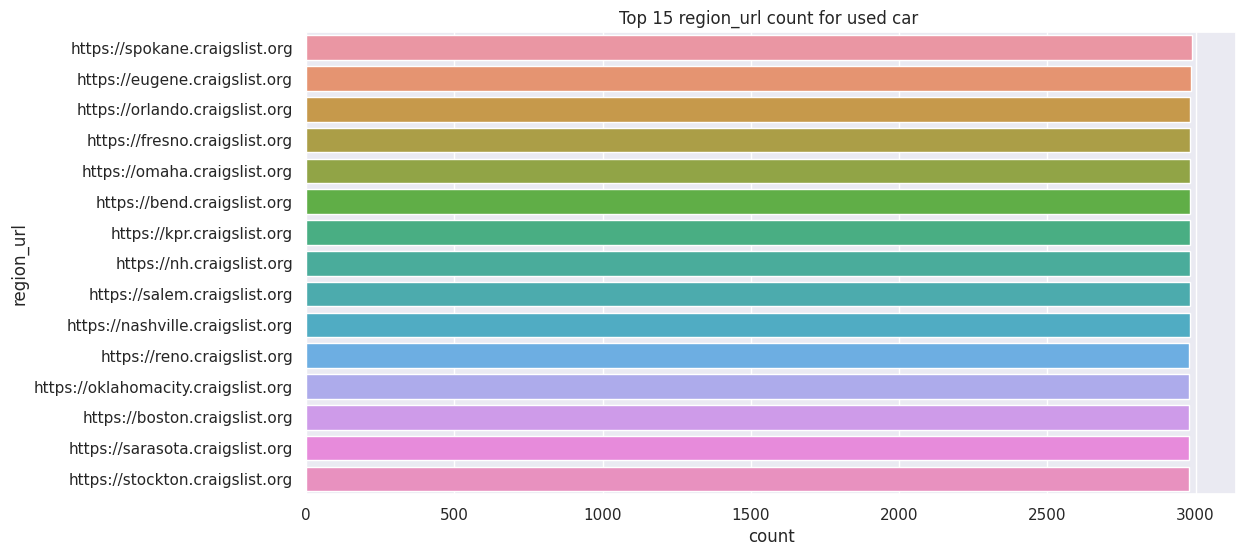

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='region_url',data=ru_count.nlargest(15, 'count')).set(title='Top 15 region_url count for used car ')
plt.show()

The region url is similar to region where the url can be replace by region and meaningless. Hence, region url can be dropped.

In [ ]:
df.drop(['region_url'],inplace=True,axis=1)

### 5. price

In [ ]:
df['price'].describe()

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

In [ ]:
df['price'].min()

0

In [ ]:
df['price'].max()

3736928711

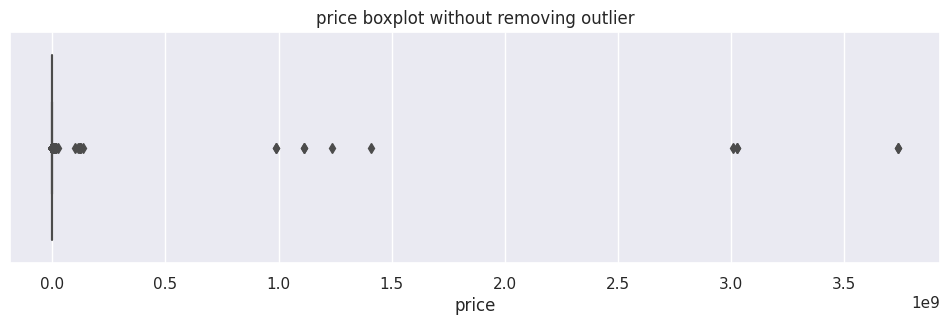

In [ ]:
plt.figure(figsize=(12,3))
sns.boxplot(x='price',data=df).set(title ='price boxplot without removing outlier')
plt.show()

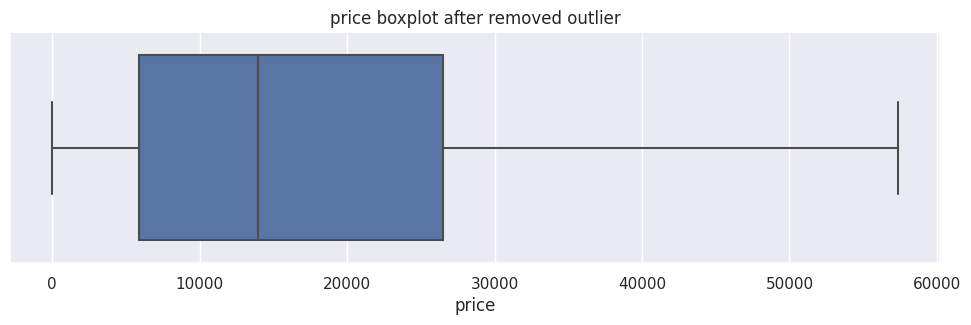

In [ ]:
plt.figure(figsize=(12,3))
sns.boxplot(x='price',data=df,showfliers=False).set(title ='price boxplot after removed outlier')
plt.show()
plt.show()

In [ ]:
price_count=df['price'].value_counts().rename_axis('price').reset_index(name='count')
price_count

price  count
0          0  32895
1       6995   3169
2       7995   3129
3       9995   2867
4       8995   2837
...      ...    ...
15650  21298      1
15651  49217      1
15652  63195      1
15653  19709      1
15654  17873      1

[15655 rows x 2 columns]

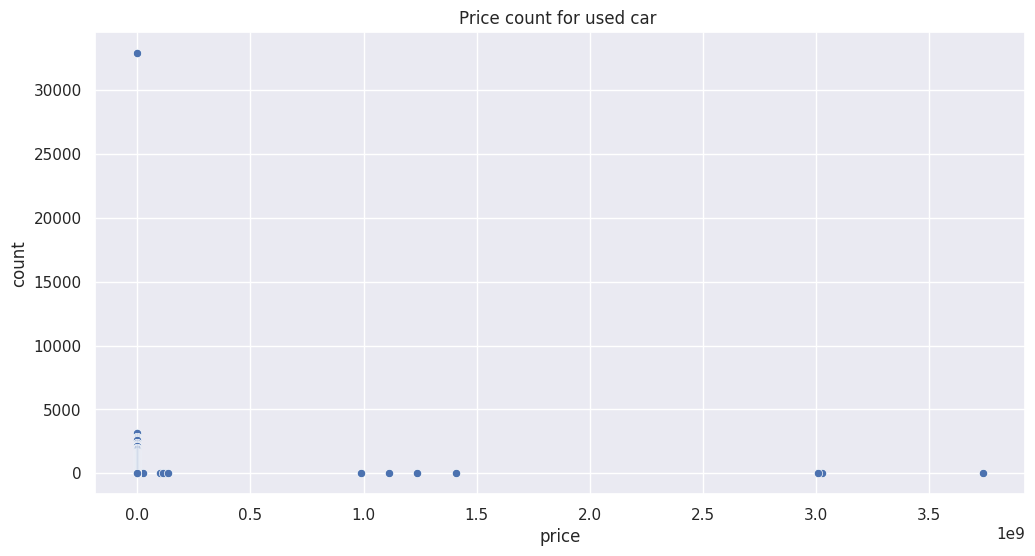

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='count',data=price_count.sort_values(by='count',ascending=False)).set(title='Price count for used car ')
plt.show()

Based on finding on the price range, some outliers on price was observed.
Some preprocessing of price need to be done to remove outlier.

In [ ]:
#q_low
ypbot = np.percentile(df.price, 1)
#q_high
yptop = np.percentile(df.price, 99)
ypad = 0.2*(yptop - ypbot)
ymin = ypbot - ypad
ymax = yptop + ypad

#ymin will be set as 0 due to price is a ratio value which minumum is 0 .
(0,ymax)

# df_filtered
df = df[(df["price"] < ymax) & (df["price"] > 0)]

#Another method
# Q1 = df["price"].quantile(0.25)
# Q3  = df["price"].quantile(0.75)
# IQR= Q3-Q1
# q_low=Q1-1.5*IQR
# q_high=Q3+1.5*IQR

# (q_low,q_high)

# # df_filtered
# # df = df[(df["price"] < q_hi) & (df["price"] > q_low)]

In [ ]:
price_count=df['price'].value_counts().rename_axis('price').reset_index(name='count')
price_count

price  count
0       6995   3169
1       7995   3129
2       9995   2867
3       8995   2837
4       4500   2778
...      ...    ...
15228   9301      1
15229  23397      1
15230  35693      1
15231  48300      1
15232  17873      1

[15233 rows x 2 columns]

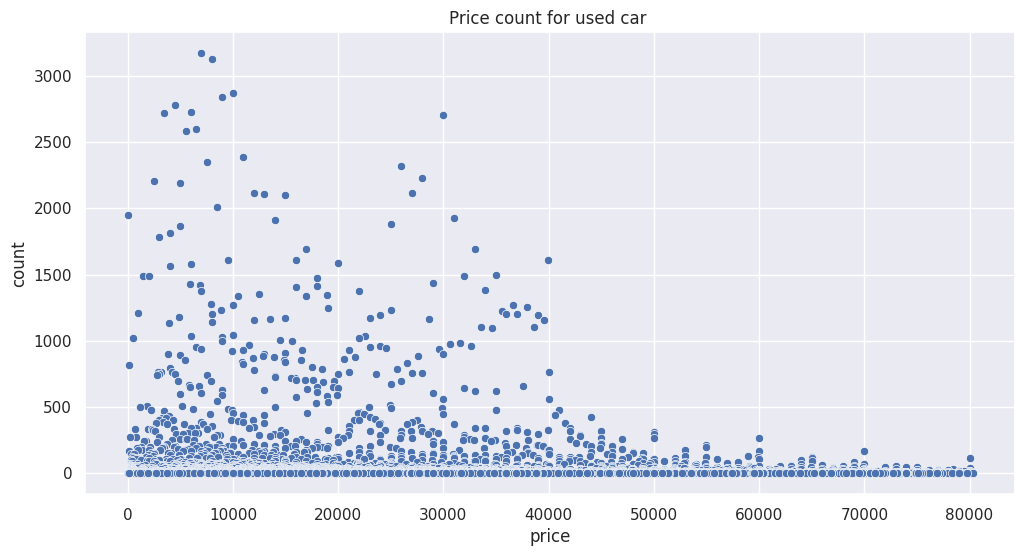

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='count',data=price_count.sort_values(by='count',ascending=False)).set(title='Price count for used car ')
plt.show()

### 6. year

In [ ]:
df['year'].describe()

count    392359.000000
mean       2011.003023
std           9.591335
min        1900.000000
25%        2008.000000
50%        2013.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

In [ ]:
df['year'].min()

1900.0

In [ ]:
df['year'].max()

2022.0

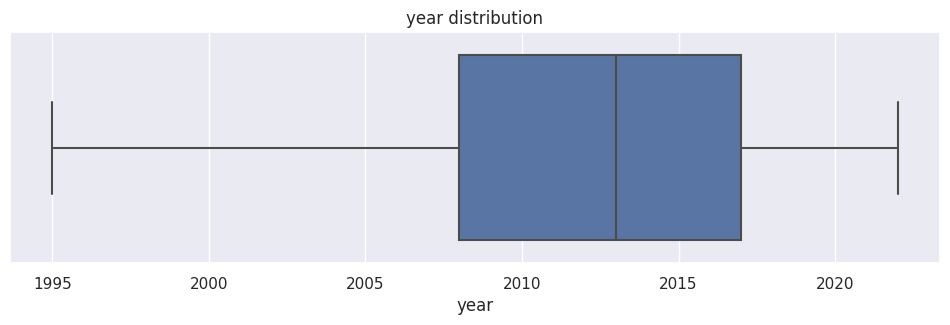

In [ ]:
plt.figure(figsize=(12,3))
sns.boxplot(x='year',data=df,showfliers=False).set(title='year distribution')
plt.show()

In [ ]:
year_count=df['year'].value_counts().rename_axis('year').reset_index(name='count')
year_count

year  count
0    2018.0  32562
1    2017.0  32560
2    2013.0  28233
3    2015.0  28041
4    2016.0  27421
..      ...    ...
107  1905.0      1
108  1943.0      1
109  1913.0      1
110  1918.0      1
111  1909.0      1

[112 rows x 2 columns]

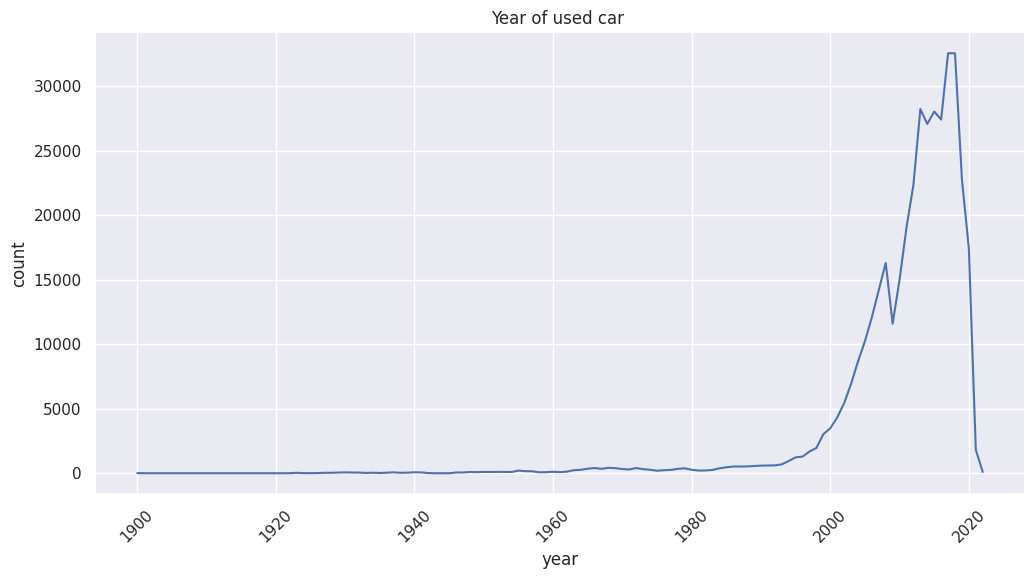

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='count',data=year_count).set(title='Year of used car ')
plt.xticks(rotation=45)
plt.show()

### 7. manufacturer

In [ ]:
df['manufacturer'].describe()

count     392359
unique        43
top         ford
freq       64607
Name: manufacturer, dtype: object

In [ ]:
df['manufacturer'].unique()

array(['Not Provided', 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep',
       'nissan', 'ram', 'mazda', 'cadillac', 'honda', 'dodge', 'lexus',
       'jaguar', 'buick', 'chrysler', 'volvo', 'audi', 'infiniti',
       'lincoln', 'alfa-romeo', 'subaru', 'acura', 'hyundai',
       'mercedes-benz', 'bmw', 'mitsubishi', 'volkswagen', 'porsche',
       'kia', 'rover', 'mini', 'pontiac', 'fiat', 'tesla', 'saturn',
       'mercury', 'harley-davidson', 'datsun', 'aston-martin',
       'land rover', 'ferrari', 'morgan'], dtype=object)

In [ ]:
manu_count=df['manufacturer'].value_counts().rename_axis('manufacturer').reset_index(name='count')
manu_count

manufacturer  count
0              ford  64607
1         chevrolet  50372
2            toyota  31591
3             honda  19866
4              jeep  17430
5            nissan  17382
6               ram  16419
7      Not Provided  15864
8               gmc  15306
9               bmw  13710
10            dodge  12283
11    mercedes-benz  10332
12          hyundai   9374
13           subaru   8984
14       volkswagen   8896
15            lexus   7727
16              kia   7547
17             audi   7141
18         cadillac   6563
19            acura   5700
20         chrysler   5652
21            buick   5178
22            mazda   5048
23         infiniti   4471
24          lincoln   4029
25            volvo   3276
26       mitsubishi   3109
27             mini   2260
28          pontiac   2227
29            rover   1942
30           jaguar   1898
31          porsche   1247
32          mercury   1136
33           saturn   1071
34       alfa-romeo    870
35            tesla    836
36             fiat    772
37  harley-davidson    138
38           datsun     63
39     aston-martin     17
40       land rover     11
41          ferrari     11
42           morgan      3

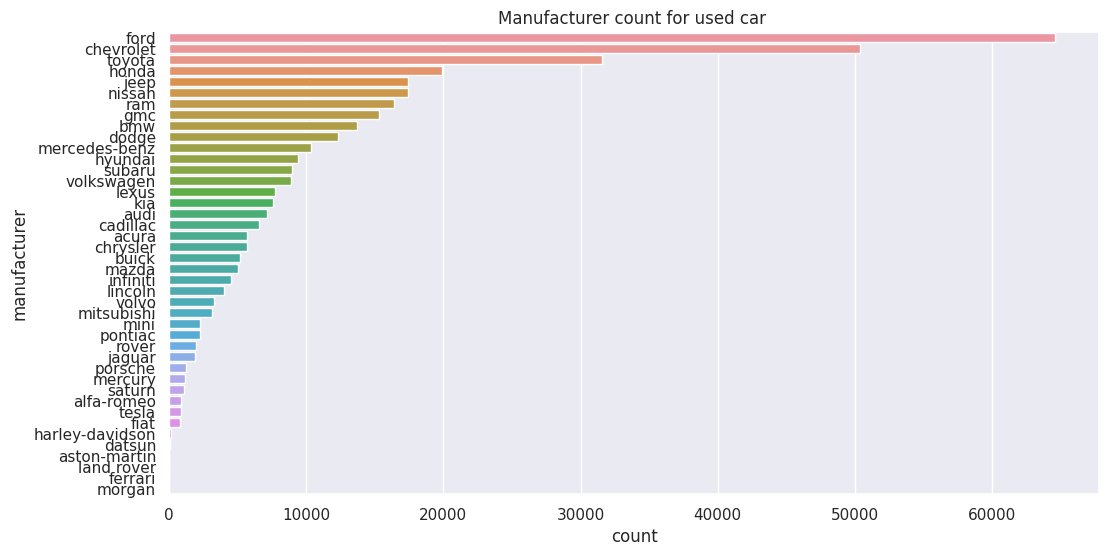

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='manufacturer',data=manu_count.query('manufacturer!="Not Provided"')).set(title='Manufacturer count for used car ')
plt.show()

### 8. model

In [ ]:
df['model'].describe()

count     392359
unique     28010
top        f-150
freq        7112
Name: model, dtype: object

In [ ]:
model_count=df['model'].value_counts().rename_axis('model').reset_index(name='count')
model_count

model  count
0                        f-150   7112
1               silverado 1500   4546
2                 Not Provided   4514
3                         1500   3796
4                        camry   2827
...                        ...    ...
28005                  ln 8000      1
28006              // vmi // ♿      1
28007     mustang fastback 2+2      1
28008                Tiger mag      1
28009  Paige Glenbrook Touring      1

[28010 rows x 2 columns]

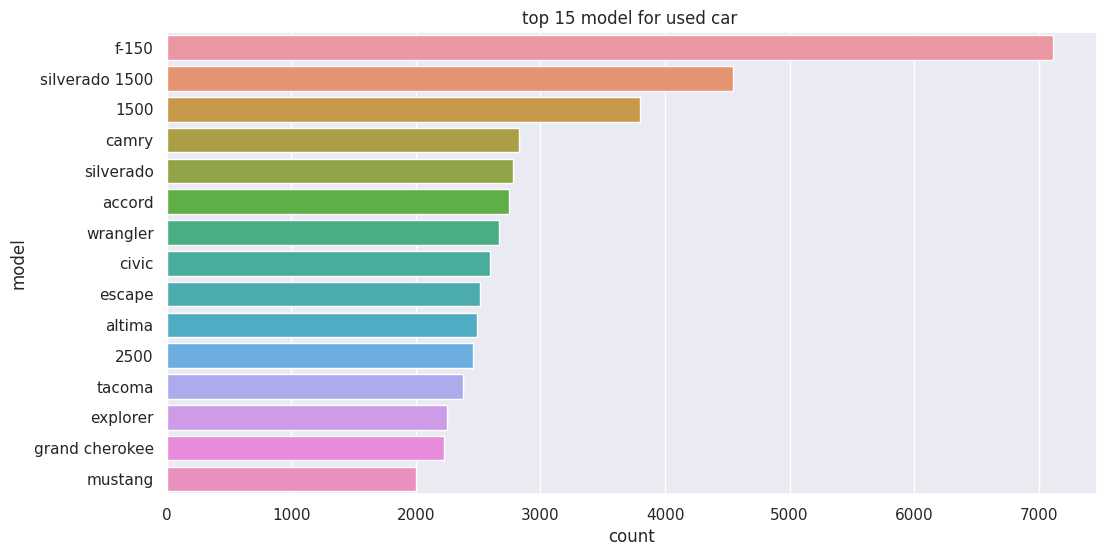

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='model',data=model_count.query('model!="Not Provided"').nlargest(15,'count')).set(title='top 15 model for used car ')
plt.show()

### 9. condition

In [ ]:
df['condition'].describe()

count           392359
unique               7
top       Not Provided
freq            150368
Name: condition, dtype: object

In [ ]:
df['condition'].unique()

array(['Not Provided', 'good', 'excellent', 'fair', 'like new', 'new',
       'salvage'], dtype=object)

In [ ]:
con_count=df['condition'].value_counts().rename_axis('condition').reset_index(name='count')
con_count

condition   count
0  Not Provided  150368
1          good  119083
2     excellent   94621
3      like new   19892
4          fair    6718
5           new    1082
6       salvage     595

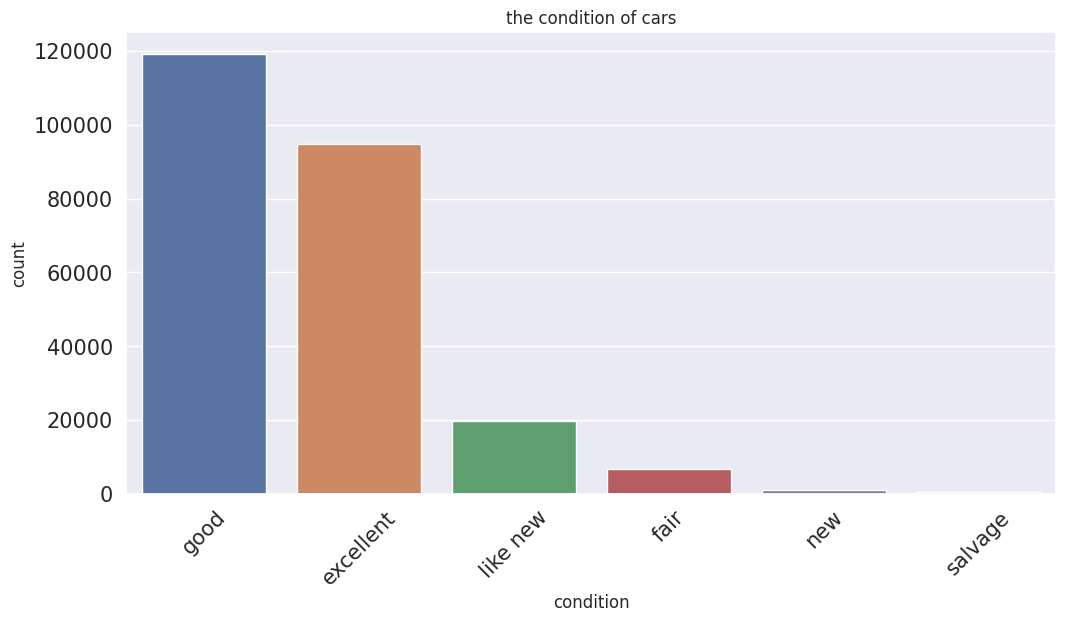

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='condition',y='count',data=con_count.query('condition!="Not Provided"')).set(title='the condition of cars')
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15);

### 10. cylinders

In [ ]:
df['cylinders'].describe()

count    231549.000000
mean          5.952481
std           1.596516
min           3.000000
25%           4.000000
50%           6.000000
75%           8.000000
max          12.000000
Name: cylinders, dtype: float64

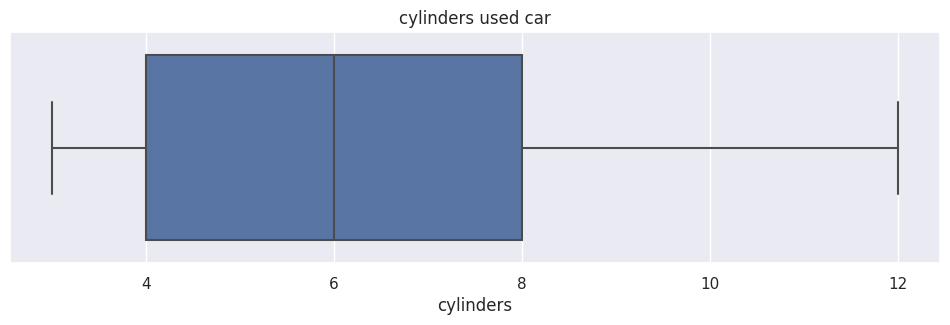

In [ ]:
plt.figure(figsize=(12,3))
sns.boxplot(x='cylinders',data=df).set(title='cylinders used car')
plt.show()

In [ ]:
cyc_count=df['cylinders'].value_counts().rename_axis('cylinders').reset_index(name='count')
cyc_count

cylinders  count
0        6.0  88719
1        4.0  72985
2        8.0  66063
3        5.0   1668
4       10.0   1338
5        3.0    611
6       12.0    165

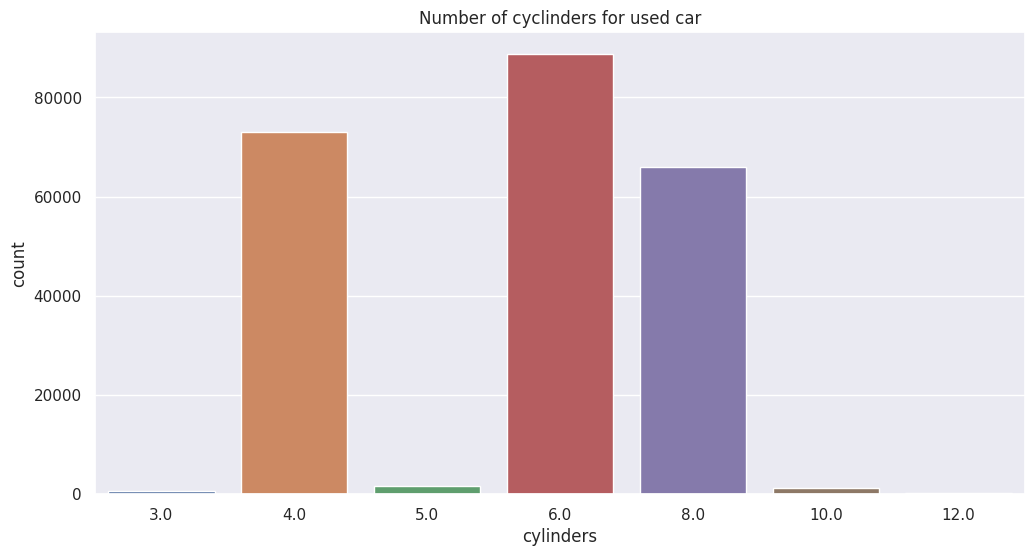

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='cylinders',y='count',data=cyc_count).set(title='Number of cyclinders for used car')
plt.show()

### 11. fuel

In [ ]:
df['fuel'].describe()

count     392359
unique         6
top          gas
freq      329490
Name: fuel, dtype: object

In [ ]:
df['fuel'].unique()

array(['Not Provided', 'gas', 'other', 'diesel', 'hybrid', 'electric'],
      dtype=object)

In [ ]:
fuel_count=df['fuel'].value_counts().rename_axis('fuel').reset_index(name='count')
fuel_count

fuel   count
0           gas  329490
1         other   27879
2        diesel   25905
3        hybrid    4884
4  Not Provided    2588
5      electric    1613

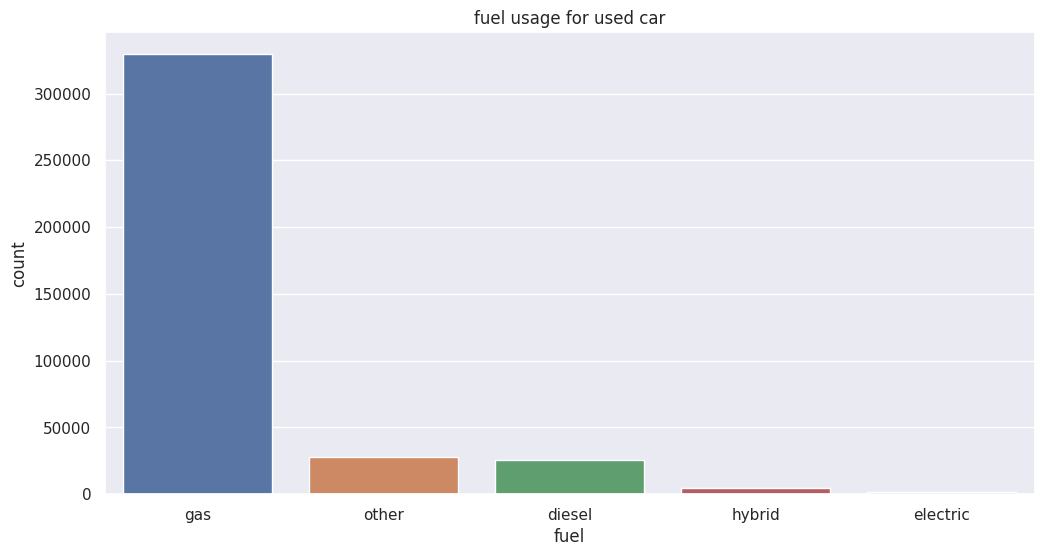

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='fuel',y='count',data=fuel_count.query('fuel!="Not Provided"')).set(title='fuel usage for used car')
plt.show()

### 12. odometer

In [ ]:
df['odometer'].describe()

count    3.900910e+05
mean     9.894297e+04
std      2.055280e+05
min      0.000000e+00
25%      3.842600e+04
50%      8.729100e+04
75%      1.356000e+05
max      1.000000e+07
Name: odometer, dtype: float64

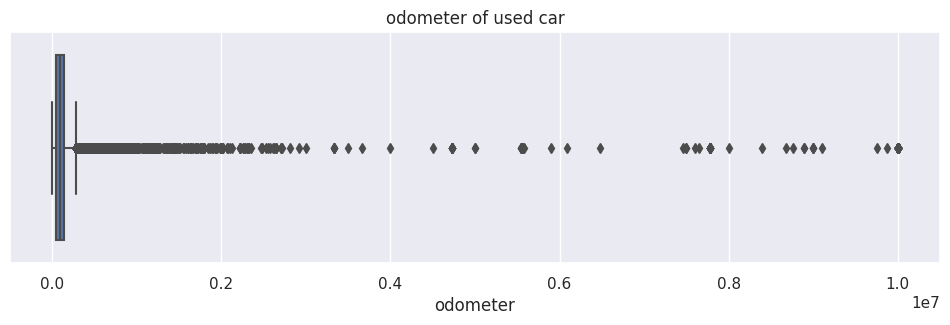

In [ ]:
plt.figure(figsize=(12,3))
sns.boxplot(x='odometer',data=df).set(title='odometer of used car')
plt.show()

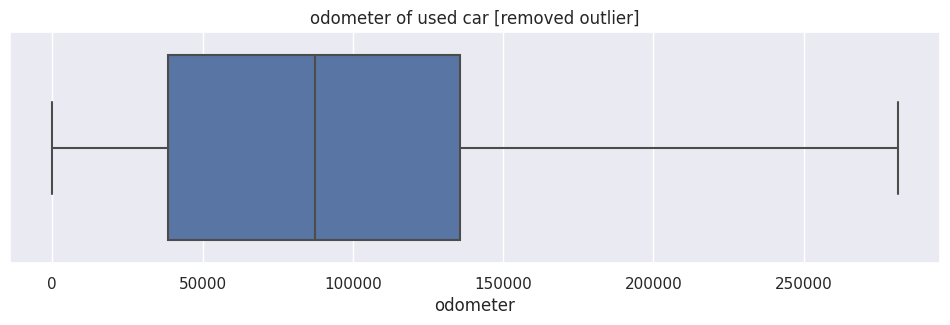

In [ ]:
plt.figure(figsize=(12,3))
sns.boxplot(x='odometer',data=df,showfliers=False).set(title='odometer of used car [removed outlier]')
plt.show()

In [ ]:
odo_count=df['odometer'].value_counts().rename_axis('odometer').reset_index(name="count")
odo_count

odometer  count
0      100000.0   2107
1           1.0   1888
2      200000.0   1674
3      150000.0   1555
4      140000.0   1220
...         ...    ...
98561   83311.0      1
98562  169009.0      1
98563   50815.0      1
98564   89772.0      1
98565   26892.0      1

[98566 rows x 2 columns]

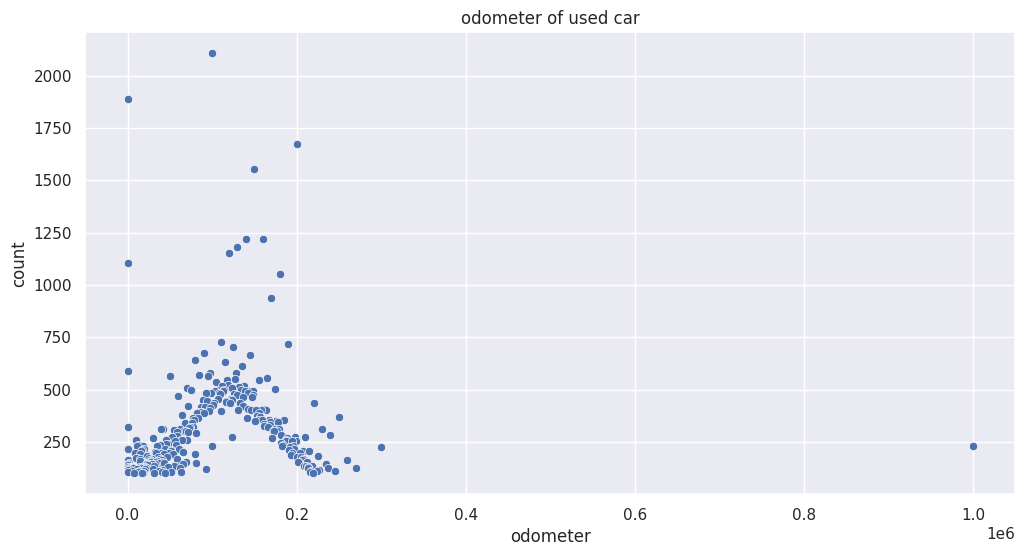

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='odometer',y='count',data=odo_count.query('count >100')).set(title='odometer of used car')
plt.show()

Based on obeservation, scaling is required on odometer to show process of normalizing the range of features in a dataset.

### 13. title_status

In [ ]:
df['id'].describe()

count         392359
unique        392359
top       7222695916
freq               1
Name: id, dtype: int64

### 14. transmission

### 15. VIN

In [ ]:
df.drop(['VIN'],inplace=True,axis=1)

### 16. drive

### 17. size

### 18. type

### 19. paint_color

### 20. image_url

In [ ]:
df.drop(['image_url'],inplace=True,axis=1)

### 21. description

In [ ]:
df.drop(['description'],inplace=True,axis=1)

### 22. state

In [ ]:
df['state']=df['state'].str.upper()

In [ ]:
df['state'].unique()

array(['AZ', 'AR', 'FL', 'MA', 'NC', 'NY', 'OR', 'PA', 'WA', 'WI', 'AL',
       'AK', 'CA', 'CO', 'CT', 'DC', 'DE', 'GA', 'HI', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NJ', 'NM', 'NH', 'ND', 'OH', 'OK', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VT', 'VA', 'WV', 'WY'], dtype=object)

In [ ]:
df['state'].nunique()

51

### 23. 'lat', 'long'

feature engineering with create a new column for lat and long.
hence, these 2 columns will be dropped.

In [ ]:
df.drop(['lat'],inplace=True,axis=1)

In [ ]:
df.drop(['long'],inplace=True,axis=1)

### 24. posting_date

## EDA Question

### Q1 : What is the price and fuel distribution between different year,cylinders and odometer?

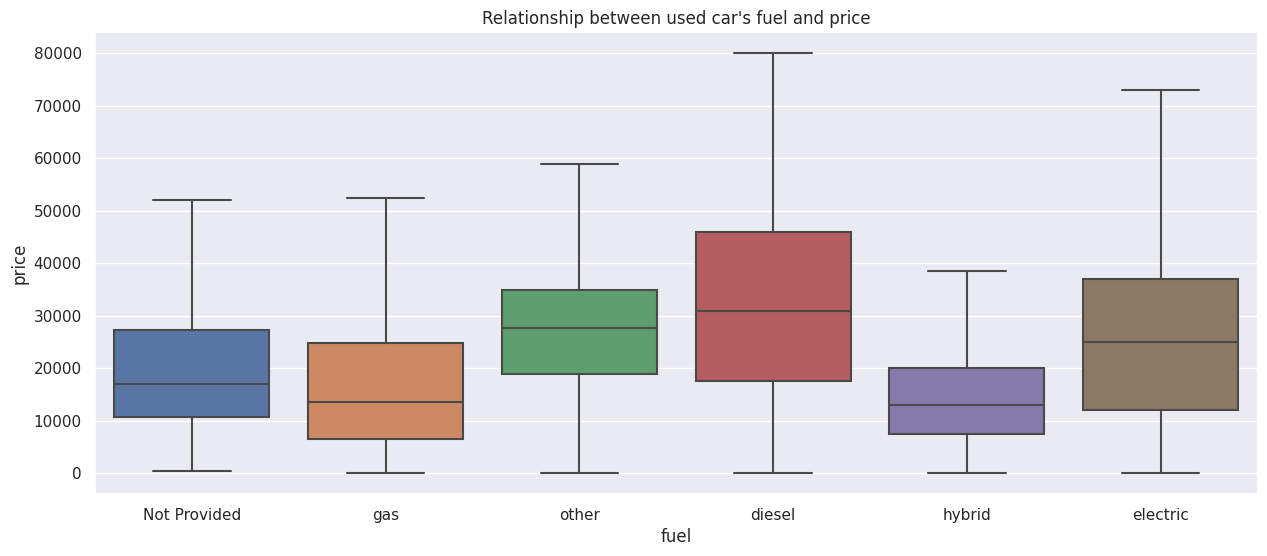

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x='fuel',y='price',data=df,showfliers=False).set(title="Relationship between used car's fuel and price")
plt.show()

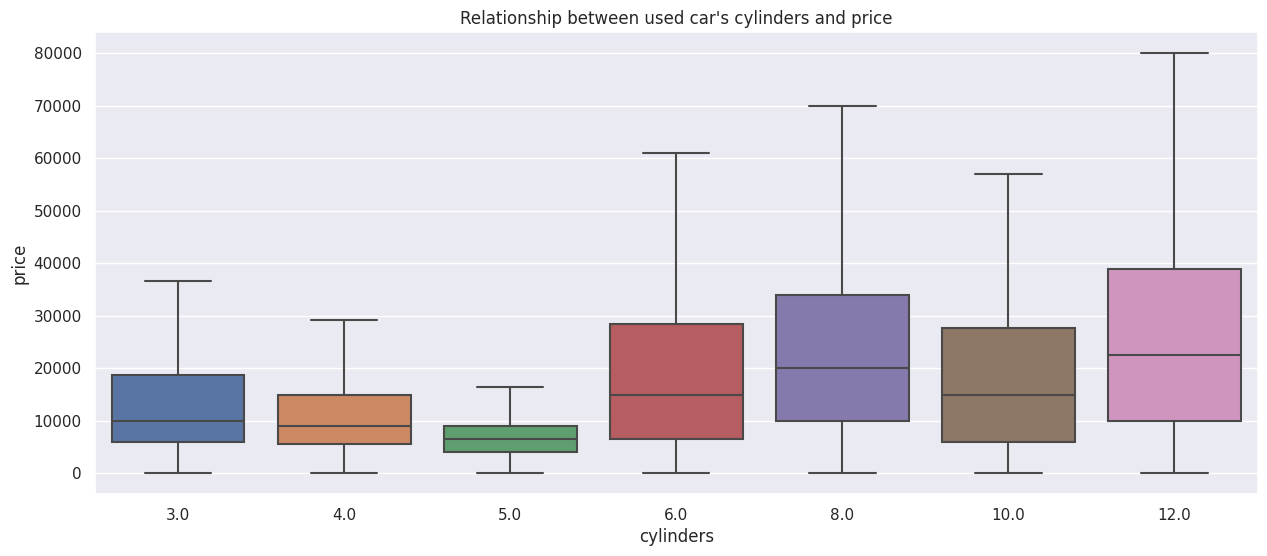

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x='cylinders',y='price',data=df,showfliers=False).set(title="Relationship between used car's cylinders and price")
plt.show()

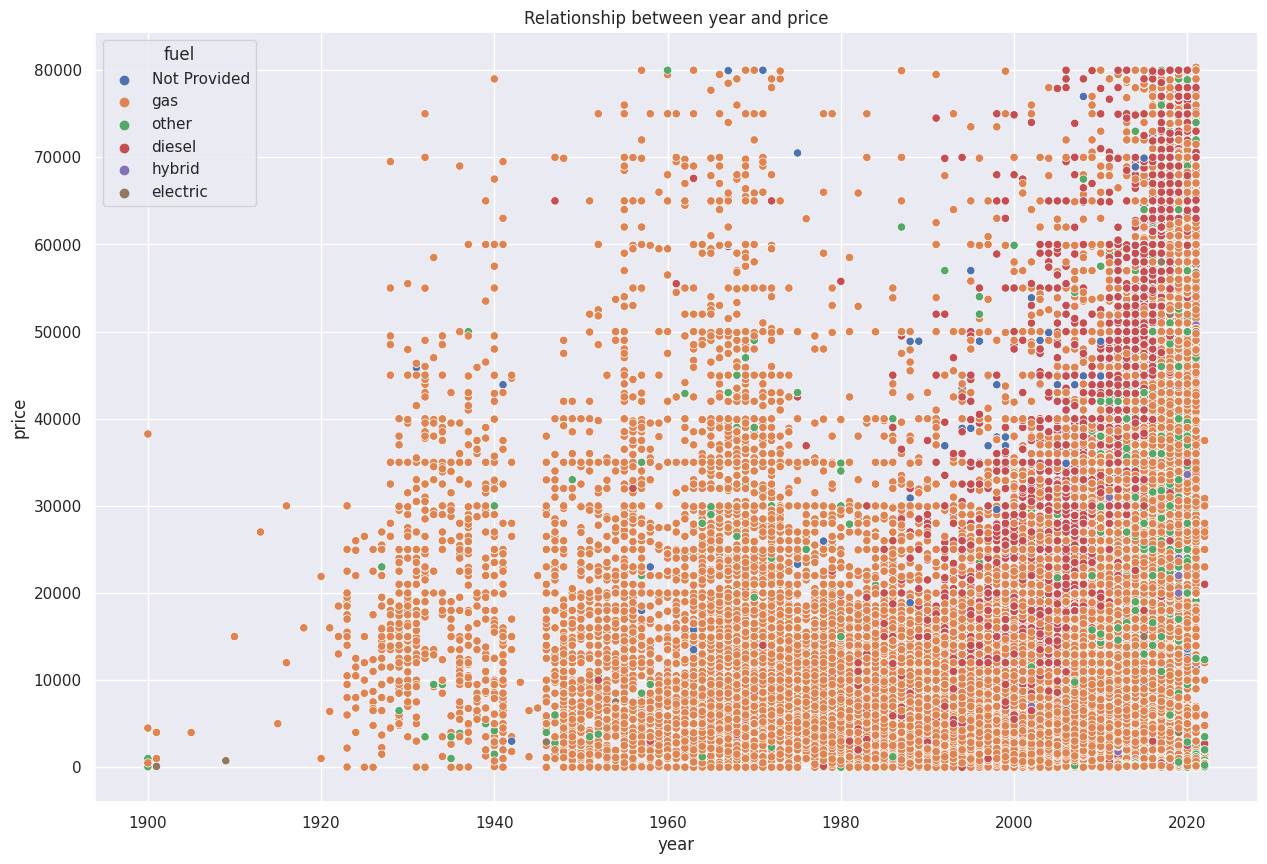

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='year',y='price',hue='fuel',data=df).set(title='Relationship between year and price')
plt.show()

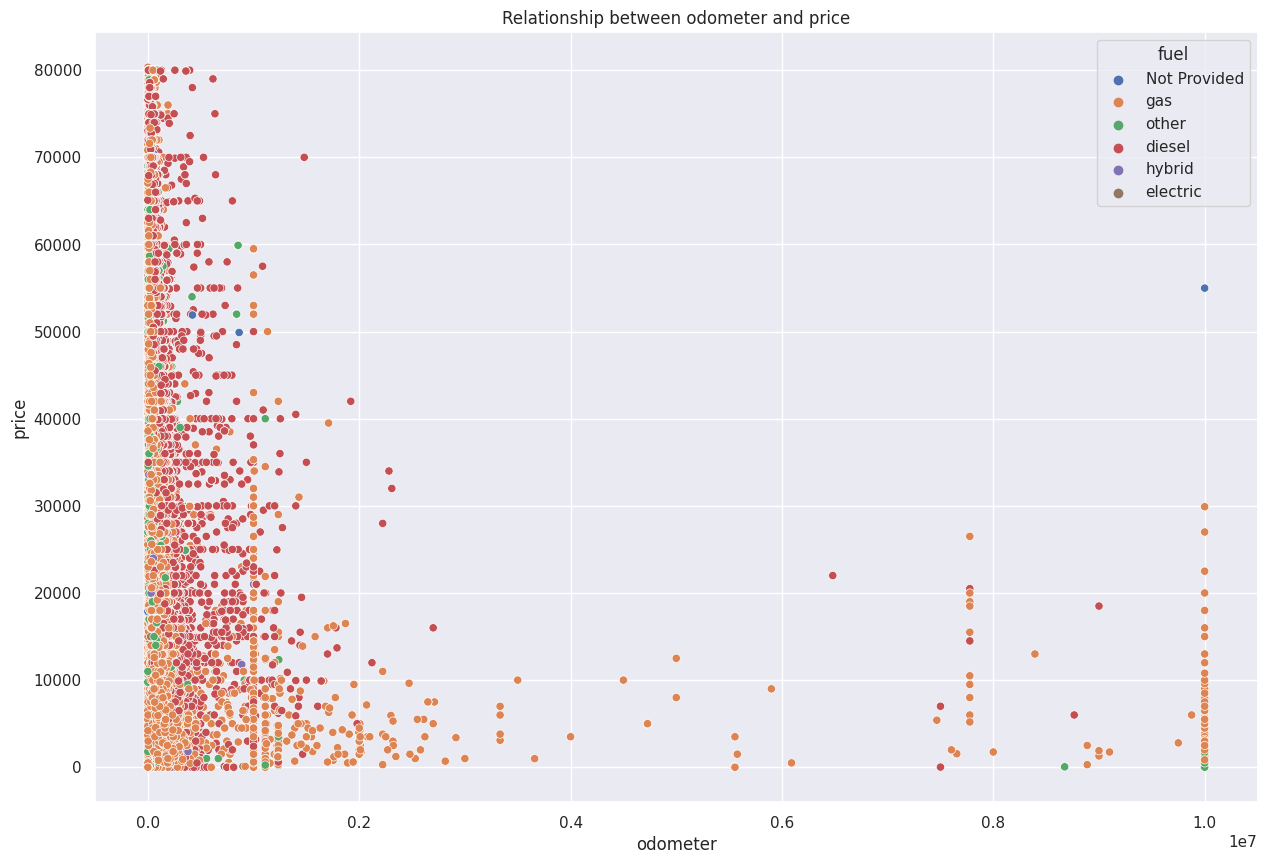

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='odometer',y='price',hue='fuel',data=df).set(title='Relationship between odometer and price')
plt.show()

### Q2 : What is the price, year and condition distribution?

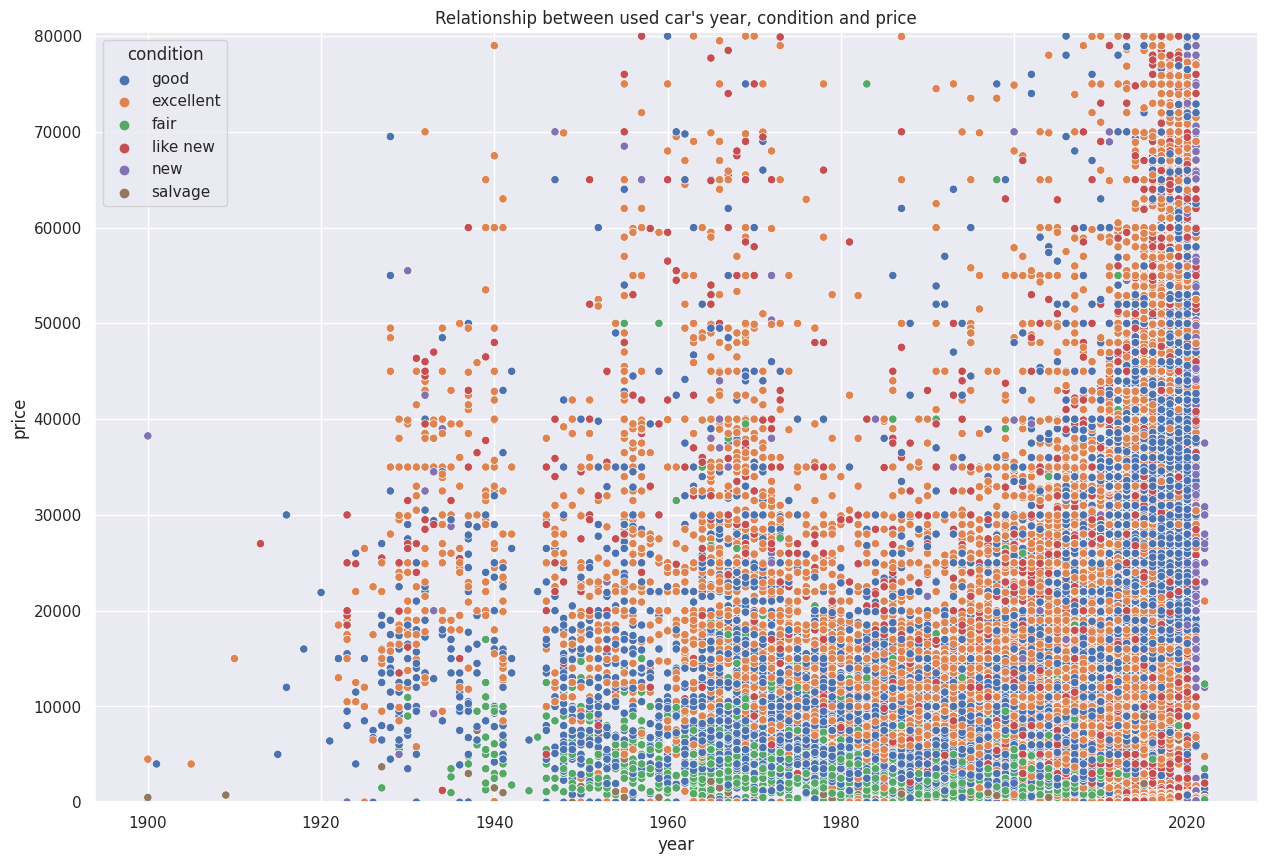

In [ ]:
plt.figure(figsize=(15,10))
plt.ylim([0, ymax])
sns.scatterplot(x='year',y='price',hue='condition',data=df.query('condition!="Not Provided"')).set(title="Relationship between used car's year, condition and price")
plt.show()

### Q3 :

### Q4 :

## First Correlation

<ipython-input-100-d0042528fd4b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


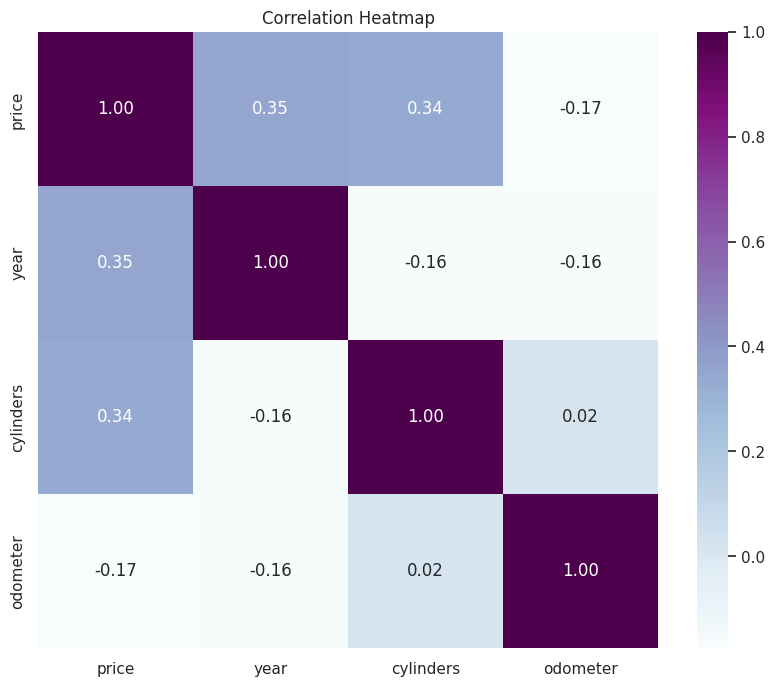

In [ ]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="BuPu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Automated Feature Engineering Tools - FeatureTools

Featuretools is a framework to perform automated feature engineering. It excels at transforming temporal and relational datasets into feature matrices for machine learning.

## Feature Tools Installation

In [ ]:
!pip install featuretools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.4/754.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: holidays
    Found existing installation: holidays 0.36
    Uninstalling holidays-0.36:
      Successfully uninstalled holidays-0.36


In [ ]:
import featuretools as ft

## Child dataframe Import

In [ ]:
!kaggle datasets download -d washimahmed/usa-latlong-for-state-abbreviations
!unzip -u "/content/usa-latlong-for-state-abbreviations.zip"
location=pd.read_csv("/content/statelatlong.csv")

  0% 0.00/1.27k [00:00<?, ?B/s]
100% 1.27k/1.27k [00:00<00:00, 2.70MB/s]
Archive:  /content/usa-latlong-for-state-abbreviations.zip
  inflating: statelatlong.csv        


In [ ]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      51 non-null     object 
 1   Latitude   51 non-null     float64
 2   Longitude  51 non-null     float64
 3   City       51 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.7+ KB


In [ ]:
location["geo"] = location[["Latitude","Longitude"]].apply(tuple, axis=1)

location.drop(['Latitude'],inplace=True,axis=1)
location.drop(['Longitude'],inplace=True,axis=1)

In [ ]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   51 non-null     object
 1   City    51 non-null     object
 2   geo     51 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [ ]:
location.head(5)

State        City                         geo
0    AL     Alabama   (32.6010112, -86.6807365)
1    AK      Alaska  (61.3025006, -158.7750198)
2    AZ     Arizona   (34.1682185, -111.930907)
3    AR    Arkansas   (34.7519275, -92.1313784)
4    CA  California  (37.2718745, -119.2704153)

## Data Preprocessing

### Library Import

In [ ]:
from sklearn import preprocessing
import matplotlib
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.metrics import mean_squared_error as MSE
from sklearn import tree
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
from IPython.display import Image
# import pydotplus
from sklearn.ensemble import RandomForestRegressor

### Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df["odometer"] = np.sqrt(preprocessing.minmax_scale(df["odometer"]))

In [ ]:
df.tail(5)

id   region  price    year manufacturer  \
426875  7301591192  wyoming  23590  2019.0       nissan   
426876  7301591187  wyoming  30590  2020.0        volvo   
426877  7301591147  wyoming  34990  2020.0     cadillac   
426878  7301591140  wyoming  28990  2018.0        lexus   
426879  7301591129  wyoming  30590  2019.0          bmw   

                           model condition  cylinders    fuel  odometer  \
426875         maxima s sedan 4d      good        6.0     gas  0.056768   
426876  s60 t5 momentum sedan 4d      good        NaN     gas  0.034683   
426877          xt4 sport suv 4d      good        NaN  diesel  0.020430   
426878           es 350 sedan 4d      good        6.0     gas  0.054874   
426879  4 series 430i gran coupe      good        NaN     gas  0.047661   

       title_status transmission         drive          size       type  \
426875        clean        other           fwd  Not Provided      sedan   
426876        clean        other           fwd  Not Provided      sedan   
426877        clean        other  Not Provided  Not Provided  hatchback   
426878        clean        other           fwd  Not Provided      sedan   
426879        clean        other           rwd  Not Provided      coupe   

         paint_color state               posting_date  
426875  Not Provided    WY  2021-04-04 03:21:31-06:00  
426876           red    WY  2021-04-04 03:21:29-06:00  
426877         white    WY  2021-04-04 03:21:17-06:00  
426878        silver    WY  2021-04-04 03:21:11-06:00  
426879  Not Provided    WY  2021-04-04 03:21:07-06:00

### Label Encoding

Label encoding will be performed in a copy df [df_copy] for further analysis

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
df_copy=df.copy()

In [ ]:
df_copy[['manufacturer','model','cylinders','fuel','title_status','transmission','drive','type','paint_color','condition','size']] = \
df_copy[['manufacturer','model','cylinders','fuel','title_status','transmission','drive','type','paint_color','condition','size']].apply(le.fit_transform)

df_copy

id                  region  price    year  manufacturer  \
0       7222695916                prescott   6000  2014.0             0   
1       7218891961            fayetteville  11900  2014.0             0   
2       7221797935            florida keys  21000  2014.0             0   
3       7222270760  worcester / central MA   1500  2014.0             0   
4       7210384030              greensboro   4900  2014.0             0   
...            ...                     ...    ...     ...           ...   
426875  7301591192                 wyoming  23590  2019.0            32   
426876  7301591187                 wyoming  30590  2020.0            42   
426877  7301591147                 wyoming  34990  2020.0             7   
426878  7301591140                 wyoming  28990  2018.0            24   
426879  7301591129                 wyoming  30590  2019.0             5   

        model  condition  cylinders  fuel  odometer  title_status  \
0        5939          0          7     0       NaN             0   
1        5939          0          7     0       NaN             0   
2        5939          0          7     0       NaN             0   
3        5939          0          7     0       NaN             0   
4        5939          0          7     0       NaN             0   
...       ...        ...        ...   ...       ...           ...   
426875  18712          3          3     3  0.056768             1   
426876  22370          3          7     3  0.034683             1   
426877  27704          3          7     1  0.020430             1   
426878  12794          3          3     3  0.054874             1   
426879   2937          3          7     3  0.047661             1   

        transmission  drive  size  type  paint_color state  \
0                  0      1     0     0            0    AZ   
1                  0      1     0     0            0    AR   
2                  0      1     0     0            0    FL   
3                  0      1     0     0            0    MA   
4                  0      1     0     0            0    NC   
...              ...    ...   ...   ...          ...   ...   
426875             3      2     0    10            0    WY   
426876             3      2     0    10            9    WY   
426877             3      1     0     5           11    WY   
426878             3      2     0    10           10    WY   
426879             3      3     0     4            0    WY   

                     posting_date  
0       2021-05-04 12:31:18-05:00  
1       2021-05-04 12:31:18-05:00  
2       2021-05-04 12:31:18-05:00  
3       2021-05-04 12:31:18-05:00  
4       2021-05-04 12:31:18-05:00  
...                           ...  
426875  2021-04-04 03:21:31-06:00  
426876  2021-04-04 03:21:29-06:00  
426877  2021-04-04 03:21:17-06:00  
426878  2021-04-04 03:21:11-06:00  
426879  2021-04-04 03:21:07-06:00  

[392359 rows x 18 columns]

## Automated Feature Engineering

- [Featuretools](https://featuretools.alteryx.com/en/stable/getting_started/using_entitysets.html#Adding-dataframes)
- [Step reference website](https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/)
- [Kaggle reference](https://www.kaggle.com/code/willkoehrsen/automated-feature-engineering-tutorial#Introduction:-Automated-Feature-Engineering)



### EntitySet creation

Now before proceeding, we will have to create an EntitySet. An EntitySet is a structure that contains multiple dataframes and relationships between them. So, let’s create an EntitySet and add the dataframe combination to it.

In [ ]:
es = ft.EntitySet(id="Cars")

### Add DataFrame
To get started, add the used_car dataframe to the EntitySet using add_dataframe.

In [ ]:
from woodwork.logical_types import Categorical, PostalCode, LatLong

es = es.add_dataframe(
    dataframe_name="used_car", dataframe=df_copy, index='id',
    time_index="posting_date",
    logical_types={
        "manufacturer": Categorical,
        'model': Categorical,
        'fuel': Categorical,
        'transmission': Categorical,
        'title_status': Categorical,
        'drive': Categorical,
        'type': Categorical,
        'paint_color': Categorical,
        'condition': Categorical,
        'size': Categorical,
    },
)

In [ ]:
es["used_car"].ww.schema

Logical Type Semantic Tag(s)
Column                                   
id                Integer       ['index']
region        Categorical    ['category']
price             Integer     ['numeric']
year               Double     ['numeric']
manufacturer  Categorical    ['category']
model         Categorical    ['category']
condition     Categorical    ['category']
cylinders         Integer     ['numeric']
fuel          Categorical    ['category']
odometer           Double     ['numeric']
title_status  Categorical    ['category']
transmission  Categorical    ['category']
drive         Categorical    ['category']
size          Categorical    ['category']
type          Categorical    ['category']
paint_color   Categorical    ['category']
state         Categorical    ['category']
posting_date     Datetime  ['time_index']

In [ ]:
es = es.add_dataframe(
    dataframe_name="location", dataframe=location,index='State',
    logical_types={
        "State":Categorical,
        "geo": LatLong,
        "City": Categorical,
        },
)
es

Entityset: Cars
  DataFrames:
    used_car [Rows: 392359, Columns: 18]
    location [Rows: 51, Columns: 3]
  Relationships:
    No relationships

In [ ]:
es["location"].ww.schema

Logical Type Semantic Tag(s)
Column                             
State   Categorical       ['index']
City    Categorical    ['category']
geo         LatLong              []

### Add Relationship

We want to relate these two dataframes by the columns in both dataframe.
1. parent dataframe,
2. child dataframe.

When specifying relationships, we need four parameters:
1. the parent dataframe name,
2. the parent column name,
3. the child dataframe name,
4. the child column name.


Note that each relationship must denote a one-to-many relationship rather than a relationship which is one-to-one or many-to-many.
The relationships is with the parent to child analogy: a parent-to-child relationship is one-to-many because for each parent, there can be multiple children

Format as below:

("Parent DataFrame","Unique Column","Child DataFrame","Unique Column")

In this case,

location = parent client dataframe,
- each state in location may have several ID selling cars in the region covering multiple rows in the used_car dataframe

used_car (df) = child dataframe
- State in location can have multiple value in state in df.

In [ ]:
es = es.add_relationship("location", "State","used_car",'state')
es

Entityset: Cars
  DataFrames:
    used_car [Rows: 392359, Columns: 18]
    location [Rows: 51, Columns: 3]
  Relationships:
    used_car.state -> location.State

This relationship will play a key role in the generation of new features

### Deep Feature Synthesis

 Use Deep Feature Synthesis to create new features automatically. Recall that DFS uses Feature Primitives to create features using multiple tables present in the EntitySet.

 - Target_dataframe_name is nothing but the entity ID for which we wish to create new features.
 - The parameter max_depth controls the complexity of the features being generated by stacking the primitives.
 - The parameter n_jobs helps in parallel feature computation by using multiple cores.

#### Feature Matrix on State

56 features was create by summarize the value based on state into parent file - location

In [ ]:
feature_matrix, feature_names = ft.dfs(entityset=es,target_dataframe_name="location",
max_depth = 2,
verbose = 1,
n_jobs = 3)

Built 56 features
Elapsed: 00:00 | Progress:   0%|          

/usr/local/lib/python3.10/dist-packages/featuretools/computational_backends/utils.py:160: UserWarning: 3 workers requested, but only 2 workers created.
  warnings.warn(warning_string)
INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:43777
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33495'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:36635'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:40659', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:40659
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:46380
INFO:distributed.scheduler:Register worker <WorkerSt

EntitySet scattered to 2 workers in 7 seconds
Elapsed: 00:04 | Progress:  48%|████▊     

INFO:distributed.scheduler:Remove client Client-269622fc-8c07-11ee-80f1-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:46382; closing.
INFO:distributed.scheduler:Remove client Client-269622fc-8c07-11ee-80f1-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-269622fc-8c07-11ee-80f1-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:33495'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:36635'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:46364; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:43633', name: 0, status: closing, memory: 1, processing: 0> (stimulus_id='handle-worker-cleanup-1700967295.763404')
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.

Elapsed: 00:06 | Progress: 100%|██████████


In [ ]:
print(feature_matrix.columns.values)

['City' 'COUNT(used_car)' 'MAX(used_car.cylinders)'
 'MAX(used_car.odometer)' 'MAX(used_car.price)' 'MAX(used_car.year)'
 'MEAN(used_car.cylinders)' 'MEAN(used_car.odometer)'
 'MEAN(used_car.price)' 'MEAN(used_car.year)' 'MIN(used_car.cylinders)'
 'MIN(used_car.odometer)' 'MIN(used_car.price)' 'MIN(used_car.year)'
 'MODE(used_car.condition)' 'MODE(used_car.drive)' 'MODE(used_car.fuel)'
 'MODE(used_car.manufacturer)' 'MODE(used_car.model)'
 'MODE(used_car.paint_color)' 'MODE(used_car.region)'
 'MODE(used_car.size)' 'MODE(used_car.title_status)'
 'MODE(used_car.transmission)' 'MODE(used_car.type)'
 'NUM_UNIQUE(used_car.condition)' 'NUM_UNIQUE(used_car.drive)'
 'NUM_UNIQUE(used_car.fuel)' 'NUM_UNIQUE(used_car.manufacturer)'
 'NUM_UNIQUE(used_car.model)' 'NUM_UNIQUE(used_car.paint_color)'
 'NUM_UNIQUE(used_car.region)' 'NUM_UNIQUE(used_car.size)'
 'NUM_UNIQUE(used_car.title_status)' 'NUM_UNIQUE(used_car.transmission)'
 'NUM_UNIQUE(used_car.type)' 'SKEW(used_car.cylinders)'
 'SKEW(used_car.

In [ ]:
feature_matrix.shape

(51, 56)

In [ ]:
feature_matrix.head()

City  COUNT(used_car)  MAX(used_car.cylinders)  \
State                                                         
AL        Alabama             4702                      7.0   
AK         Alaska             3421                      7.0   
AZ        Arizona             8195                      7.0   
AR       Arkansas             3237                      7.0   
CA     California            45119                      7.0   

       MAX(used_car.odometer)  MAX(used_car.price)  MAX(used_car.year)  \
State                                                                    
AL                   1.000000              80000.0              2021.0   
AK                   0.351364              80000.0              2021.0   
AZ                   1.000000              79999.0              2022.0   
AR                   0.418779              78423.0              2021.0   
CA                   1.000000              80000.0              2022.0   

       MEAN(used_car.cylinders)  MEAN(used_car.odometer)  \
State                                                      
AL                     4.366014                 0.086769   
AK                     3.607425                 0.078249   
AZ                     4.216595                 0.085802   
AR                     5.298116                 0.086976   
CA                     4.216450                 0.089054   

       MEAN(used_car.price)  MEAN(used_car.year)  ...  SUM(used_car.price)  \
State                                             ...                        
AL             20979.408975          2011.889409  ...           98645181.0   
AK             23636.452499          2013.014323  ...           80860304.0   
AZ             20134.539597          2010.527761  ...          165002552.0   
AR             21769.118011          2012.380908  ...           70466635.0   
CA             18145.257009          2010.350651  ...          818695851.0   

       SUM(used_car.year)  MODE(used_car.DAY(posting_date))  \
State                                                         
AL              9459904.0                                23   
AK              6886522.0                                16   
AZ             16476275.0                                 3   
AR              6514077.0                                30   
CA             90705011.0                                 4   

       MODE(used_car.MONTH(posting_date))  \
State                                       
AL                                      4   
AK                                      4   
AZ                                      4   
AR                                      4   
CA                                      4   

      MODE(used_car.WEEKDAY(posting_date)) MODE(used_car.YEAR(posting_date))  \
State                                                                          
AL                                       0                              2021   
AK                                       4                              2021   
AZ                                       0                              2021   
AR                                       4                              2021   
CA                                       0                              2021   

      NUM_UNIQUE(used_car.DAY(posting_date))  \
State                                          
AL                                        30   
AK                                        30   
AZ                                        30   
AR                                        30   
CA                                        30   

      NUM_UNIQUE(used_car.MONTH(posting_date))  \
State                                            
AL                                           2   
AK                                           2   
AZ                                           2   
AR                                           2   
CA                                           2   

      NUM_UNIQUE(used_car.WEEKDAY(posting_date))  \
State                    

<ipython-input-129-f007484655e0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix2 = feature_matrix.corr()


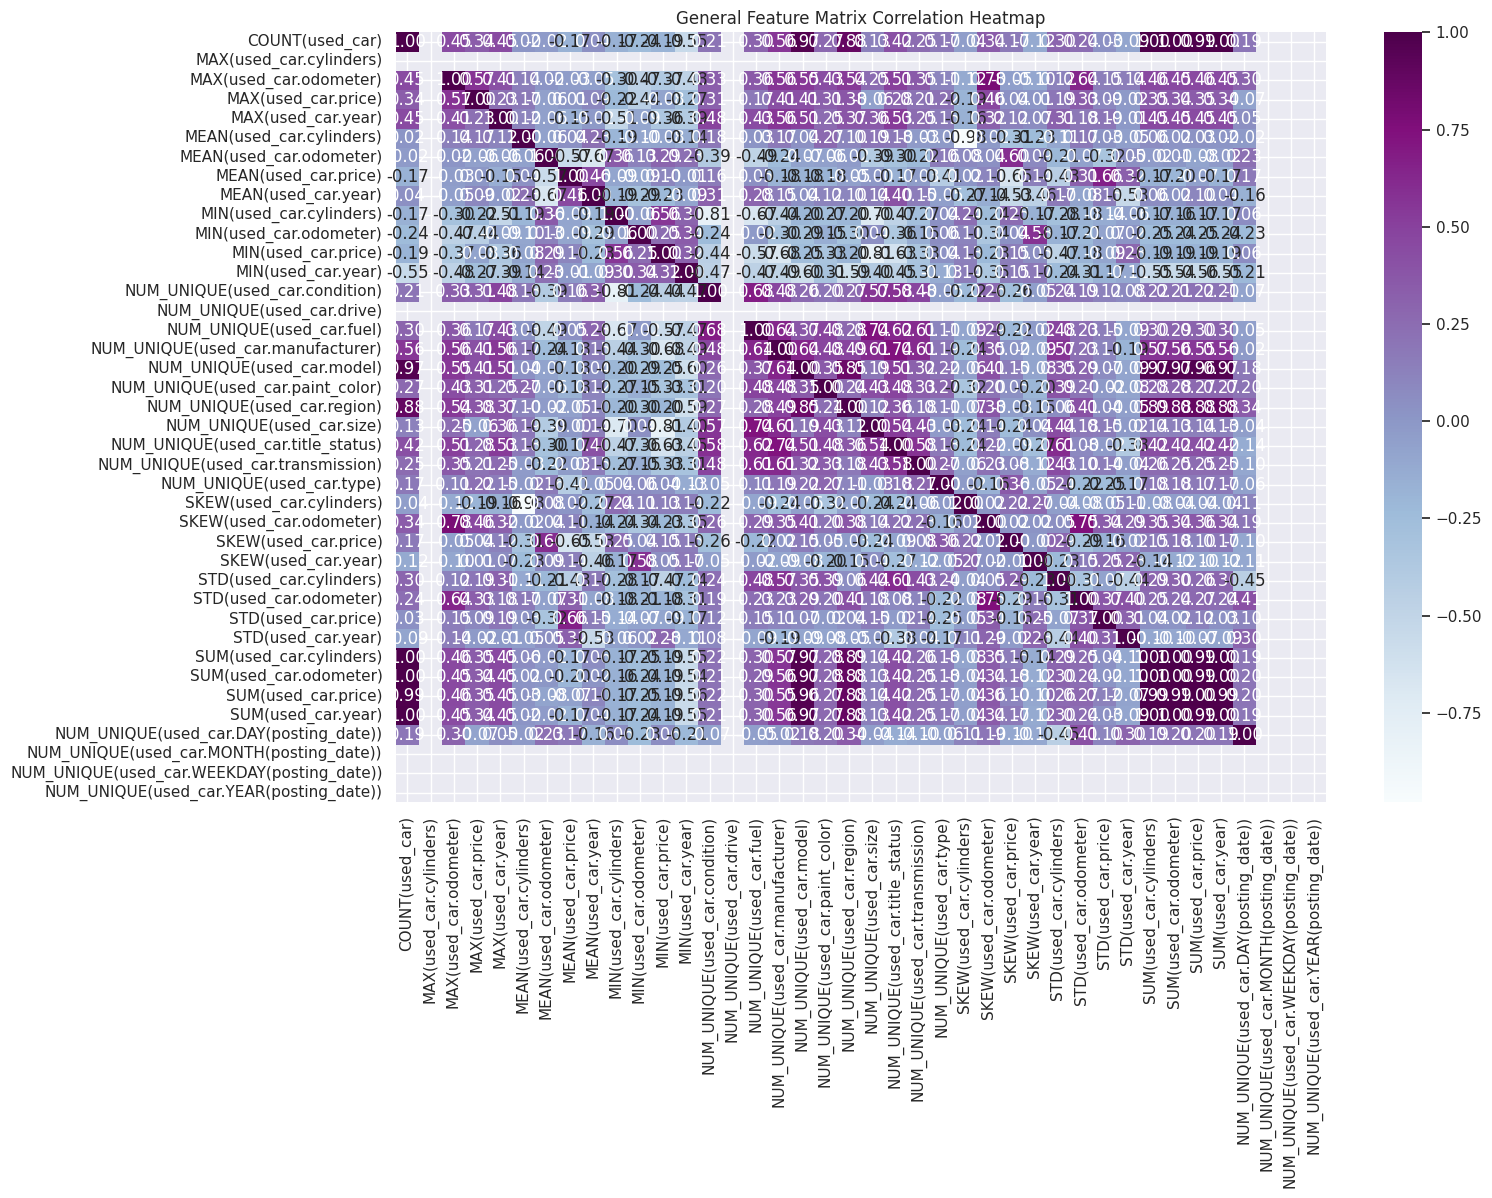

In [ ]:
# Create a correlation matrix
correlation_matrix2 = feature_matrix.corr()

# a general heat map
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix2, annot=True, cmap="BuPu", fmt=".2f")
plt.title("General Feature Matrix Correlation Heatmap")
plt.show()

<Axes: >

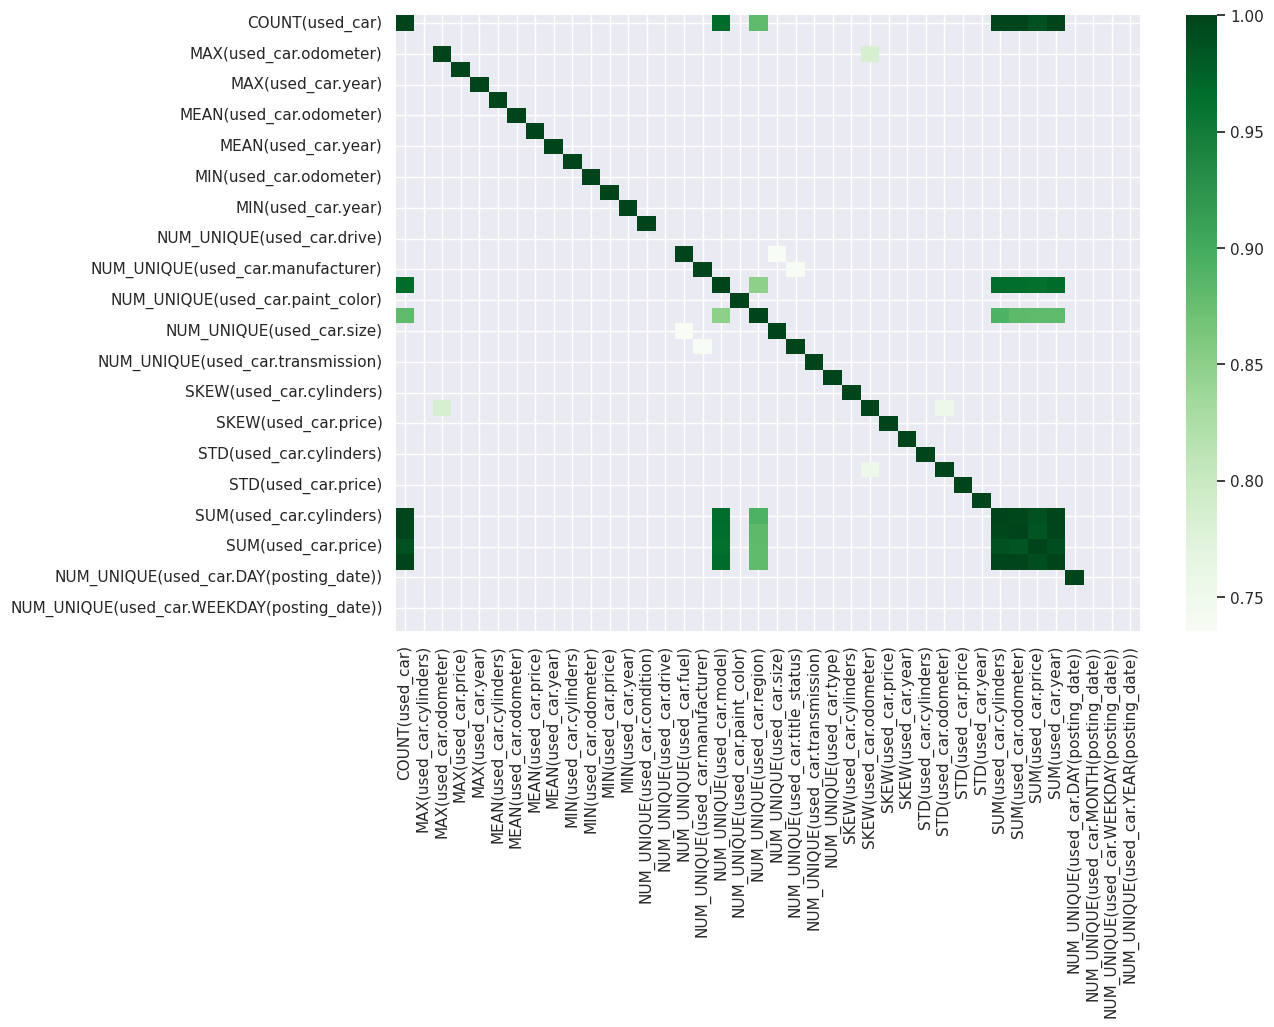

In [ ]:
kot = correlation_matrix2[correlation_matrix2>=.7]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [ ]:
pd.DataFrame(feature_matrix.corr().unstack().sort_values(ascending=False).drop_duplicates())

<ipython-input-160-39918831a51a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(feature_matrix.corr().unstack().sort_values(ascending=False).drop_duplicates())


0
COUNT(used_car)                COUNT(used_car)           1.000000
                               SUM(used_car.year)        1.000000
SUM(used_car.odometer)         COUNT(used_car)           0.998789
SUM(used_car.year)             SUM(used_car.odometer)    0.998786
                               SUM(used_car.cylinders)   0.998123
...                                                           ...
NUM_UNIQUE(used_car.size)      MIN(used_car.cylinders)  -0.700000
NUM_UNIQUE(used_car.condition) MIN(used_car.cylinders)  -0.808122
NUM_UNIQUE(used_car.size)      MIN(used_car.price)      -0.809967
SKEW(used_car.cylinders)       MEAN(used_car.cylinders) -0.979929
COUNT(used_car)                MAX(used_car.cylinders)        NaN

[597 rows x 1 columns]

##### **Variable with correltion > 0.95**

COUNT(used_car)	 <>  SUM(used_car.year)	=  0.999999894576012
- There is a strong positive correlation (0.9999999) between count of used car vs car.year. This is expected the frequncy of selling used car is increasing from year to year hence sum of used_car year increase due to more count on used_car to sell

---
SUM(used_car.odometer) <>	COUNT(used_car)	= 0.998788682031238
- This can be explained that the more the used car, the sum of odometer expected to be increasing due to mileage of every used car will be sum up together.

---
SUM(used_car.year) <>	SUM(used_car.odometer) = 0.998785632623515
-  This can be explained that the older the car , the higher mileage accumulated causing higher odometer value.

---
SUM(used_car.year)	<> SUM(used_car.cylinders) =	0.9981232525504192
- This can be expected the increasing year , the increasing of used car causing the increading of number of cyclinder.

---
COUNT(used_car)	<> SUM(used_car.cylinders)	= 0.998102949264189
- The more used car, the more the used car cylinder can be added up.

---
SUM(used_car.odometer)	<> SUM(used_car.cylinders)	= 0.9975161426821444
- the higher the odometer values, is expecting that number of used car increasing casuing increasing on sum of used car cylinders.

---
SUM(used_car.year)	<> SUM(used_car.price)	= 0.9907003729113133
- The latest the used_car year , the higher the used_car price
---

COUNT(used_car) <>	SUM(used_car.price)	= 0.990669100835796
- The increasing of used car leading to increasing of sum of used_car price due to accumulation.

---
SUM(used_car.cylinders) <>	SUM(used_car.price)	0.9900193809707999
- The more the used car cylinders is expecting the higher of used_car price due to increasing on car performace
---
SUM(used_car.odometer)	<> SUM(used_car.price)	0.985826036434468
- The increasing of odometer sum is assuming that the car price increased due to number of car increase causing by accumulation.
---
NUM_UNIQUE(used_car.model)	<> COUNT(used_car)	0.9671018272773892
- The number of used car increased is expecting the variaty of car increasing leading to unique car model increasing.
---
NUM_UNIQUE(used_car.model)	<> SUM(used_car.year)	0.9670906624073488
- The number of unique used car's model increasing expecting more number of car count causing on increasing in accumulation of car year.
---
SUM(used_car.cylinders)	<> NUM_UNIQUE(used_car.model)	0.9659188187532523
- Smilar with used_car year where increasing in number of car causing number of unique car model increasing leading to sum of car cylinder increasing also.
---
SUM(used_car.odometer)	<> NUM_UNIQUE(used_car.model)	0.9655766359801101
- The more the used_car model is expecting that the number of used car count increased and leading to increase in sum of use_car odometer.
---
SUM(used_car.price)	NUM_UNIQUE(used_car.model)	0.9632573828900137
- The increasing in unique used_car model is expecting sum of used car price increased due to varity of car increased with higher with uncommon used_casr and count of used car increased.

#### Feature Matrix on Used Car

Total 68 features created based on ID

In [ ]:
feature_matrix2, feature_names = ft.dfs(entityset=es,target_dataframe_name="used_car",
max_depth = 2,
verbose = 1,
n_jobs = 3)

Built 68 features
Elapsed: 00:00 | Progress:   0%|          

/usr/local/lib/python3.10/dist-packages/featuretools/computational_backends/utils.py:160: UserWarning: 3 workers requested, but only 2 workers created.
  warnings.warn(warning_string)
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:37993
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34459'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:35739'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:43005', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:43005
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:51250
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:34255', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.

EntitySet scattered to 2 workers in 4 seconds
Elapsed: 00:21 | Progress:  95%|█████████▌

INFO:distributed.scheduler:Remove client Client-088266ff-8c08-11ee-80f1-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:51256; closing.
INFO:distributed.scheduler:Remove client Client-088266ff-8c08-11ee-80f1-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-088266ff-8c08-11ee-80f1-0242ac1c000c
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:34459'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:35739'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:51242; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:34255', name: 0, status: closing, memory: 1, processing: 0> (stimulus_id='handle-worker-cleanup-1700967688.2037513')
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0

Elapsed: 00:25 | Progress: 100%|██████████


In [ ]:
print(feature_matrix2.columns.values)

['region' 'price' 'year' 'manufacturer' 'model' 'condition' 'cylinders'
 'fuel' 'odometer' 'title_status' 'transmission' 'drive' 'size' 'type'
 'paint_color' 'state' 'DAY(posting_date)' 'MONTH(posting_date)'
 'WEEKDAY(posting_date)' 'YEAR(posting_date)' 'location.City'
 'location.COUNT(used_car)' 'location.MAX(used_car.cylinders)'
 'location.MAX(used_car.odometer)' 'location.MAX(used_car.price)'
 'location.MAX(used_car.year)' 'location.MEAN(used_car.cylinders)'
 'location.MEAN(used_car.odometer)' 'location.MEAN(used_car.price)'
 'location.MEAN(used_car.year)' 'location.MIN(used_car.cylinders)'
 'location.MIN(used_car.odometer)' 'location.MIN(used_car.price)'
 'location.MIN(used_car.year)' 'location.MODE(used_car.condition)'
 'location.MODE(used_car.drive)' 'location.MODE(used_car.fuel)'
 'location.MODE(used_car.manufacturer)' 'location.MODE(used_car.model)'
 'location.MODE(used_car.paint_color)' 'location.MODE(used_car.region)'
 'location.MODE(used_car.size)' 'location.MODE(used_car.ti

In [ ]:
feature_matrix2.shape

(392359, 68)

In [ ]:
feature_matrix2.head()

region  price    year manufacturer  model condition  \
id                                                                        
7301583321   hudson valley  18997  2013.0           11  11824         1   
7301583353   hudson valley  51997  2017.0            8  23637         1   
7301583380   hudson valley  28997  2016.0           40  24895         1   
7301583505  kenosha-racine    119  2013.0           11  11599         1   
7301583889        richmond  18937  2011.0            0   4735         0   

            cylinders fuel  odometer title_status  ...  \
id                                                 ...   
7301583321          7    3  0.098222            1  ...   
7301583353          7    1  0.085575            1  ...   
7301583380          7    3  0.096647            1  ...   
7301583505          1    3  0.084735            0  ...   
7301583889          7    3  0.063246            1  ...   

           location.SKEW(used_car.price) location.SKEW(used_car.year)  \
id                                                                      
7301583321                      0.961632                    -3.803062   
7301583353                      0.961632                    -3.803062   
7301583380                      0.961632                    -3.803062   
7301583505                      0.902649                    -3.523291   
7301583889                      0.993805                    -3.417298   

           location.STD(used_car.cylinders) location.STD(used_car.odometer)  \
id                                                                            
7301583321                         2.336006                        0.039873   
7301583353                         2.336006                        0.039873   
7301583380                         2.336006                        0.039873   
7301583505                         2.276363                        0.039920   
7301583889                         2.320372                        0.041219   

           location.STD(used_car.price) location.STD(used_car.year)  \
id                                                                    
7301583321                 13284.810715                    9.780465   
7301583353                 13284.810715                    9.780465   
7301583380                 13284.810715                    9.780465   
7301583505                 12384.418672                    8.719557   
7301583889                 12870.960301                    8.917384   

           location.SUM(used_car.cylinders) location.SUM(used_car.odometer)  \
id                                                                            
7301583321                          77990.0                     1521.630950   
7301583353                          77990.0                     1521.630950   
7301583380                          77990.0                     1521.630950   
7301583505                          49409.0                     1008.696059   
7301583889                          38955.0                      829.322141   

           location.SUM(used_car.price) location.SUM(used_car.year)  
id                                                                   
7301583321                  321574990.0                  35877274.0  
7301583353                  321574990.0                  35877274.0  
7301583380                  321574990.0                  35877274.0  
7301583505                  185749589.0                  22427825.0  
7301583889                  147344098.0                  17574184.0  

[5 rows x 68 columns]

<ipython-input-144-b0121442fd61>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix3 = feature_matrix2.corr()


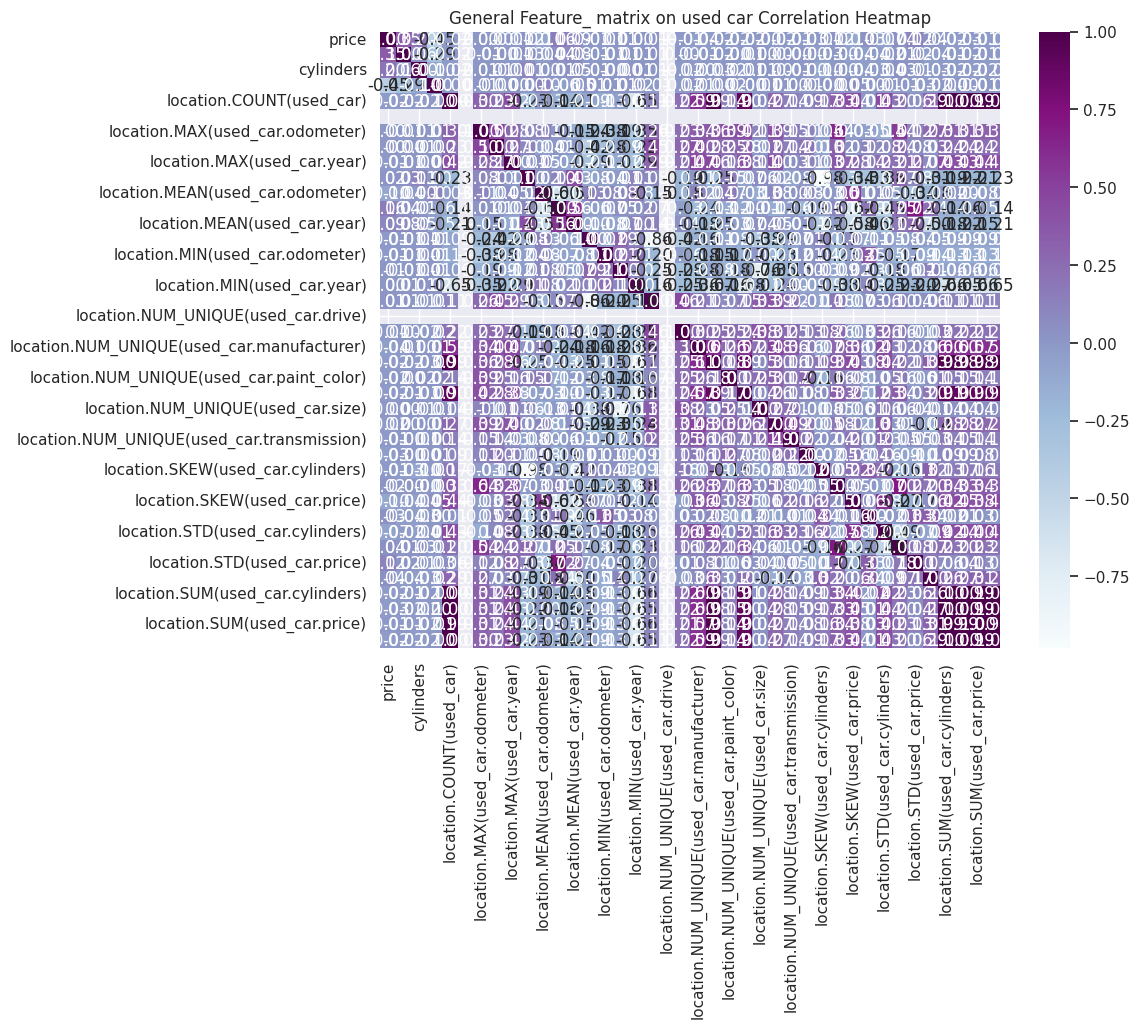

In [ ]:
correlation_matrix3 = feature_matrix2.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix3, annot=True, cmap="BuPu", fmt=".2f")
plt.title("General Feature_ matrix on used car Correlation Heatmap")
plt.show()

<Axes: >

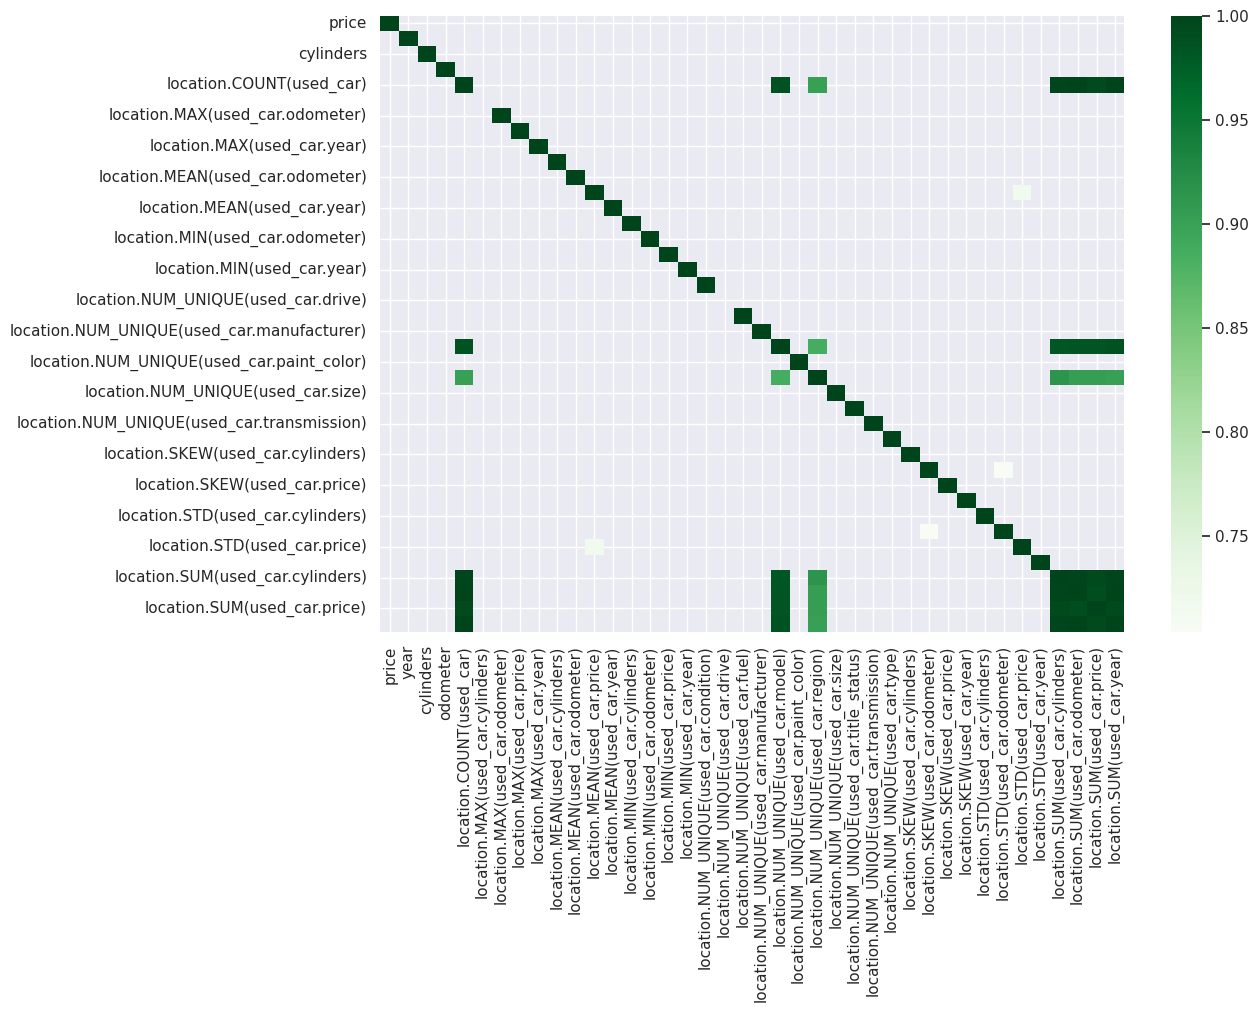

In [ ]:
kot = correlation_matrix3[correlation_matrix3>=.7]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [ ]:
pd.DataFrame(feature_matrix2.corr().unstack().sort_values(ascending=False).drop_duplicates())

<ipython-input-163-5100724f75d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(feature_matrix2.corr().unstack().sort_values(ascending=False).drop_duplicates())


0
price                                   price                                 1.000000
location.COUNT(used_car)                location.SUM(used_car.year)           1.000000
location.SUM(used_car.odometer)         location.SUM(used_car.year)           0.999232
                                        location.COUNT(used_car)              0.999231
location.SUM(used_car.year)             location.SUM(used_car.cylinders)      0.998440
...                                                                                ...
location.MIN(used_car.year)             location.NUM_UNIQUE(used_car.region) -0.679776
location.NUM_UNIQUE(used_car.size)      location.MIN(used_car.price)         -0.755671
location.NUM_UNIQUE(used_car.condition) location.MIN(used_car.cylinders)     -0.864832
location.SKEW(used_car.cylinders)       location.MEAN(used_car.cylinders)    -0.978904
price                                   location.MAX(used_car.cylinders)           NaN

[705 rows x 1 columns]

##### Variable with correlation >0.95

location.COUNT(used_car) <>	location.SUM(used_car.year) =	0.9999999043272239\
- A location of count used_car increased expected that the accumulation of sum year increased.
---
location.SUM(used_car.odometer)	<> location.SUM(used_car.year)	= 0.9992321363479792 \
- Sum of odometer is resulted by number of used car increasing leading to increasing of used_car year accumulation.
---
location.SUM(used_car.odometer)	<> location.COUNT(used_car)	=0.999231066856518\
-  Sum of odometer is resulted by number of used car increasing
---
location.SUM(used_car.year)	><> location.SUM(used_car.cylinders) =	0.9984401392064384\
- Sum of used_car year is resulted by number of used car increasing leading to increasing of number of cylinder in accumulation.
---
location.SUM(used_car.cylinders) <>	location.COUNT(used_car)	= 0.9984188578634621
- The higher the number of used_car, the more the number of cylinders in accumulation.
---
location.SUM(used_car.odometer)	location.SUM(used_car.cylinders) =	0.9983496561287524
- The higher the number of used_car leading to increased on sum of odometer and number of cylinder in accumulation.
---
location.SUM(used_car.year)	location.SUM(used_car.price)=	0.994055652186982
- The higher the number of used_car leading to increased on sum of used_car year and sum of price in accumulation.
---
location.COUNT(used_car)	location.SUM(used_car.price)=	0.9940350238125101
- The more the count of used _car , the more the accumulation on used_car price in sum.
---
location.SUM(used_car.cylinders)	location.SUM(used_car.price)	0.993481525425382
- The more the number of cylinders is expecting the much more expensive of used_car price due to better performance.
---
location.SUM(used_car.odometer)	location.SUM(used_car.price) =	0.9911263328236977
- The more the number of count car, the more the sum on used_car odometer and used_ car price.
---
location.NUM_UNIQUE(used_car.model)	location.COUNT(used_car)=	0.9855751157282292
- The increasing of number of used_car is expecting that the variety of used car increased with more unique car models.
---
location.NUM_UNIQUE(used_car.model)	location.SUM(used_car.year)=	0.985560344345374
- the more the unique car_model, the more the number of used car causing the larger the sum of use_car year.
---
location.SUM(used_car.price)	location.NUM_UNIQUE(used_car.model)	=0.984104613867063
- the more the unique car_model, the more the number of used car causing the larger the sum of used_car price.
---
location.NUM_UNIQUE(used_car.model)	location.SUM(used_car.odometer)	= 0.9838382664543747
- the more the unique car_model, the more the number of used car causing the higher the odometer due to accumulation.
---
location.NUM_UNIQUE(used_car.model)	location.SUM(used_car.cylinders)=	0.9824709934771189
- the more the unique car_model, the more the number of used car causing the more the sum of used car cylinder.

### Export

In [ ]:
feature_matrix.to_csv("feature_matrix.csv")

In [ ]:
feature_matrix2.to_csv("feature_matrix2.csv")

## Conclusion

Feature engineering helped in extract more information and insights from used_car's data, making it more suitable for machine learning algorithms.
It is expecting to improve the speed of training and testing while avoiding overfitting and the curse of dimensionality. Additionally, feature engineering can enhance the signal-to-noise ratio of your data, improving accuracy and robustness while reducing the impact of outliers and missing values. It can also capture interactions and relationships among features and revealing hidden patterns and trends in the data and increasing the explanatory power of your models.

Automated feature engineering had been reduce time consumption on feature engineering in aspect below.
- Creation of New Features
- Managing Missing Values
- Outlier Detection


As a result, the correlation matrix heatmap result had been enchanced significantly compared to original dataset and increased in number of features